Automatic Ticket Assignment

Problem:

Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.


Abstract:

An attempt at Leveraging Machine Learning and Artifical intelligence to automatically classify tickets and assign them to the right owner in a timely manner to save effort, increase user satifaction and improve throughput in the ticketing pipeline of an organization.

Objective:

To undertake a multi-faceted project that demonstrates your understanding and mastery of the key conceptual and technological aspects of Deep Learning.

To develop an understanding of how challenging human-level problems can be approached and solved using a combination of tools and techniques.
To understand current scenarios in deep learning, understand the practicalities and the trade-offs that need to be made when solving a problem in real life.

###Importing Standard Libraries###

In [ ]:
import warnings, os
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import string

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

###Load the dataset###

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
os.chdir('/content/drive/My Drive')
os.getcwd()

'/content/drive/My Drive'

In [ ]:
tk_df = pd.read_excel(r'/content/drive/My Drive/input_data.xlsx')

##Exploring and understanding the dataset##

In [ ]:
# Verifying the number of examples and columns in the dataset
print('The shape of the data is :number of rows:',tk_df.shape[0],' number of columns: ',tk_df.shape[1])

The shape of the data is :number of rows: 8500  number of columns:  4


In [ ]:
# Viewing the first 5 rows from the dataset
print('First five rows from the dataset are:\n')
tk_df.head()

First five rows from the dataset are:



,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
# Column names
print('Columns in the dataset are\n',tk_df.columns)

Columns in the dataset are
 Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')


In [ ]:
# Renaming the columns for our working convenience
tk_df.rename(columns={"Short description":"Short_Description", "Assignment group" : "Assignment_Group"}, inplace=True)
print('After renaming the columns the columns names are:\n',)
tk_df.head(2)

After renaming the columns the columns names are:



,Short_Description,Description,Caller,Assignment_Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0


As we can see, there are 4 columns in the dataset - Short Description, Description, Caller and Assignment group. Out of these, the column Caller does not add any relevance or value to our model building, so we can remove that. The target column is Assignment Group, with different labels as below

In [ ]:
#Dropping column Caller as it has no relevance
tk_df.drop('Caller', axis=1, inplace=True)
print('Column Caller is now dropped')
print('The shape of the data is :number of rows:',tk_df.shape[0],' number of columns: ',tk_df.shape[1])

Column Caller is now dropped
The shape of the data is :number of rows: 8500  number of columns:  3


In [ ]:
# Verifying the datatypes of the columns in the dataset
tk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short_Description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Assignment_Group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


As we see in the above code, all the columns are object type

In [ ]:
#checking the number of unique groups and their names
no_groups = tk_df['Assignment_Group'].nunique()
print('Total number of groups : ', no_groups)
print('Group names :')
tk_df['Assignment_Group'].unique()

Total number of groups :  74
Group names :


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

There are in total 74 different assignment groups to which the incidents are assigned, which means we have 74 different classes to be considered as our targets. 

In [ ]:
# Describing high level view of the dataset
tk_df.describe(include='object')

,Short_Description,Description,Assignment_Group
count,8492,8499,8500
unique,7481,7817,74
top,password reset,the,GRP_0
freq,38,56,3976


The most frequent incident which has been reported by the users is 'password reset', which belongs to GRP_0. Let's check which group has the description as 'the'

In [ ]:
# Checking which Group has the shortdesc as 'password reset'
pwd_reset_grp = tk_df[tk_df['Short_Description'] == 'password reset']['Assignment_Group'].unique()
print('Group with short desc as password reset : ', pwd_reset_grp)

# Checking which Group has the desc as 'the'
the_grp = tk_df[tk_df['Description'] == 'the']['Assignment_Group'].unique()
print('Group with desc as "the" : ', the_grp)

Group with short desc as password reset :  ['GRP_0']
Group with desc as "the" :  ['GRP_17']


For GRP_17, we will check at a later stage, as what all incidents have been reported, using WordCloud. Then we will see whether we can move all the password reset incidents from GRP_0 to GRP_17. This is done to ensure GRP_17 group gets some more additional data, and moving them also won't harm GRP_0 group as it already dominates the dataset.

##Data pre-processing##

###Exploratory Data Analysis###


###Handling missing values in the dataset###

In [ ]:
# Checking of there are any null and nan values
print(tk_df.isnull().sum())

Short_Description    8
Description          1
Assignment_Group     0
dtype: int64


In [ ]:
print(tk_df.isna().sum())

Short_Description    8
Description          1
Assignment_Group     0
dtype: int64


We can see that there are 8 missing values in both the columns Short_Description and 1 missing value in Description. Let us see below how to handle them

In [ ]:
# Viewing the data where there are missing values in Short_Description column
print('Details of missing value in Short_Description are\n  ')
tk_df[tk_df['Short_Description'].isnull() == True]

Details of missing value in Short_Description are
  


,Short_Description,Description,Assignment_Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


In [ ]:
# Viewing the data where there are missing values in Description column
print('Details of missing value in Description are\n  ')
tk_df[tk_df['Description'].isnull() == True]

Details of missing value in Description are
  


,Short_Description,Description,Assignment_Group
4395,i am locked out of skype,NaN,GRP_0


In [ ]:
# Viewing the rows that contain 'unable to login' as description
tk_df[tk_df['Description'].str.contains(r'unable\s+tologin', na=False)]

,Short_Description,Description,Assignment_Group
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3922,vpn login issue.,vpn login issue.\r\n-user unable tologin to v...,GRP_0


By looking at the description, we can understand that these are all related to vpn login issues. Hence, we can impute the missing values in Short_Description column as a 'vpn login issue' for all of the above missing records.



In [ ]:
# Imputing the missing values for Short Description column

tk_df1 = tk_df.copy() # Creating a copy of the original dataframe
mask1 = tk_df1['Description'].str.startswith('-user unable', na=False)
mask2 = tk_df1['Short_Description'].isna() == True

tk_df1.loc[mask1, 'Short_Description'] = tk_df1.loc[mask1, 'Short_Description'].apply(lambda x : 'vpn login issue')

In [ ]:
# Imputing the missing values for Description column
# Description copied the same as Short_Description column

tk_df1['Description'] = tk_df1['Description'].fillna(tk_df1['Short_Description'])

In [ ]:
# Now re-checking the missing values for Short_Description column, after imputation
tk_df1[tk_df1['Short_Description'].isnull() == True]

,Short_Description,Description,Assignment_Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


We can see that out of 8 missing values, 4 have been imputed. For the remaining missing values, we can consider dropping them

In [ ]:
# Dropping rows having NaN values for both Short_Description and Description columns
tk_df1.dropna(axis=0, subset=['Short_Description'], inplace=True)

In [ ]:
# Re-checking whether there are any missing values

tk_df1.isna().sum()

Short_Description    0
Description          0
Assignment_Group     0
dtype: int64

In [ ]:
print('The shape of the data after deleting the missing values is :number of rows:',tk_df1.shape[0],' number of columns: ',tk_df1.shape[1])

The shape of the data after deleting the missing values is :number of rows: 8496  number of columns:  3


###Removing Duplicates###

In [ ]:
# Checking for duplicates in the dataset except the first occurence across all columns

no_duplicates = len(tk_df1[tk_df1.duplicated()])
print('Number of Duplicates in the dataset : ', no_duplicates)

Number of Duplicates in the dataset :  591


In [ ]:
# Checking the count of duplicates across each group

tk_df1[tk_df1.duplicated()].groupby('Assignment_Group').count()

,Short_Description,Description
Assignment_Group,,
GRP_0,547,547
GRP_12,1,1
GRP_15,1,1
GRP_17,13,13
GRP_19,1,1
GRP_21,1,1
GRP_24,4,4
GRP_4,1,1
GRP_5,1,1


Out of 74 assignment groups, 12 groups have duplicates. They predominantly exist for GRP_0 which has majority of incidents assigned. Let's remove them

In [ ]:
# Removing the duplicates

tk_df1.drop_duplicates(inplace=True)
tk_df1.reset_index(drop=True, inplace=True)

In [ ]:
# Checking the modified shape of the dataset
print('The shape of the data after deleting the duplicate values is :number of rows:',tk_df1.shape[0],' number of columns: ',tk_df1.shape[1])
tk_df1.shape

The shape of the data after deleting the duplicate values is :number of rows: 7905  number of columns:  3


(7905, 3)

Now we can see that, from the original dataset of 8500 observations, 5 records with missing values have been removed, and 591 duplicate rows have been removed. Now the dataset is good to proceed further

###Assignment_Group Analysis###

In [ ]:
# Printing the assignment groups with the count of incidents
print('the assignment groups with the count of incidents\n')
tk_df1['Assignment_Group'].value_counts()

the assignment groups with the count of incidents



GRP_0     3426
GRP_8      645
GRP_24     285
GRP_12     256
GRP_9      252
          ... 
GRP_73       1
GRP_35       1
GRP_61       1
GRP_70       1
GRP_64       1
Name: Assignment_Group, Length: 74, dtype: int64

We can see that, out of the total 7905 incidents, GRP_0 alone has been assigned majority of around 43% of the incidents, followed by Group_8 which has been assigned around 8% of the incidents. Rest of the groups contain very minimal incidents, contributing to just 2 or 3 %.

By this, we can understand that GRP_0 is a very critical group in solving the L3 level tickets, either assigned by L1/L2 teams or directly assigned by the requestors.

In [ ]:
# Printing the assignment groups with the percentage of incidents
target_counts = tk_df1.groupby('Assignment_Group').size().sort_values(ascending=False).reset_index(name='Ticket_Counts')
target_counts['Ticket_Percentage'] = round(target_counts['Ticket_Counts'] / (tk_df1.shape[0]) * 100, 2)
print('Assignment Groups with percentage of incidents assigned to them\n')
target_counts.head(10)

Assignment Groups with percentage of incidents assigned to them



,Assignment_Group,Ticket_Counts,Ticket_Percentage
0,GRP_0,3426,43.34
1,GRP_8,645,8.16
2,GRP_24,285,3.61
3,GRP_12,256,3.24
4,GRP_9,252,3.19
5,GRP_2,241,3.05
6,GRP_19,214,2.71
7,GRP_3,200,2.53
8,GRP_6,183,2.31
9,GRP_13,145,1.83


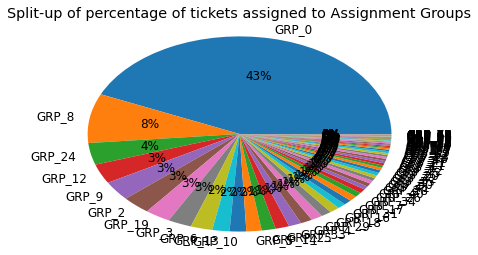

In [ ]:
# Plotting a pie-chart to visualize the split up of tickets
fig, axes = plt.subplots()

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize']=(10, 10)

labels= target_counts['Assignment_Group']
percentages = target_counts['Ticket_Percentage']
axes.pie(x=percentages, labels=labels, autopct='%1.0f%%', pctdistance=0.6,labeldistance=1.1)
axes.axis('auto')
axes.set_title('Split-up of percentage of tickets assigned to Assignment Groups')
#axes.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

plt.show()

Top 10 groups incident counts


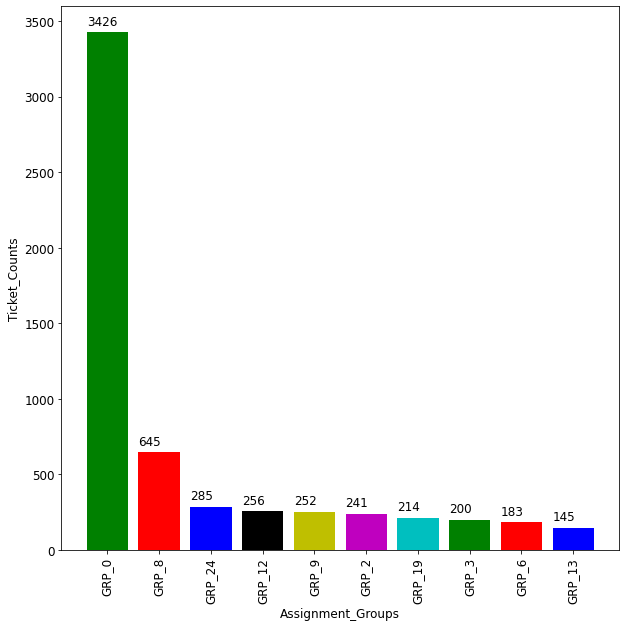

In [ ]:
# Visualising a bar chart for the top 10 groups
print('Top 10 groups incident counts')
bars = plt.bar(x=target_counts['Assignment_Group'][:10], 
               height=target_counts['Ticket_Counts'][:10], 
               label=target_counts['Ticket_Counts'][:10], color='grbkymc', width=0.8)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 50, yval)

    plt.xlabel('Assignment_Groups')
    plt.ylabel('Ticket_Counts')
    
    plt.xticks(rotation=90)
plt.show()


Distribution of top 10 assignment groups based on ticket counts and percentage


[Text(0, 0.5, 'Ticket_Counts'), Text(0.5, 0, 'Assignment_Group')]

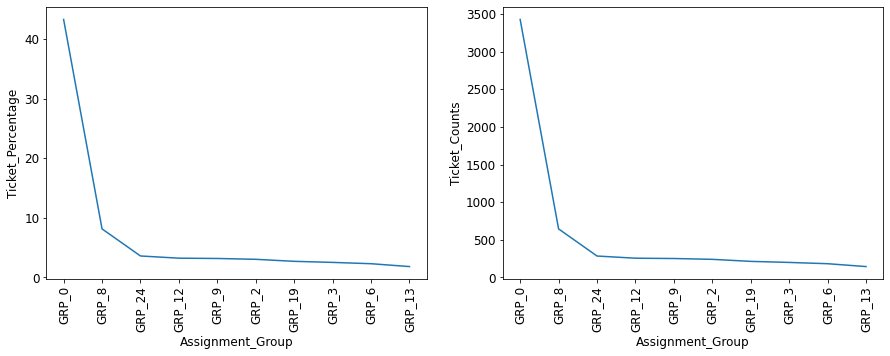

In [ ]:
# Distribution of top 10 assignment groups based on ticket counts and percentage
#sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
print('Distribution of top 10 assignment groups based on ticket counts and percentage')
ax1.plot(target_counts['Assignment_Group'][:10], target_counts['Ticket_Percentage'][:10])
ax1.set_xticklabels(target_counts['Assignment_Group'], rotation=90)
ax1.set(xlabel='Assignment_Group', ylabel='Ticket_Percentage')

ax2.plot(target_counts['Assignment_Group'][:10], target_counts['Ticket_Counts'][:10])
ax2.set_xticklabels(target_counts['Assignment_Group'], rotation=90)
ax2.set(xlabel='Assignment_Group', ylabel='Ticket_Counts')

In [ ]:
# Checking for Assignment Groups having less than 10 tickets

target_less_10 = tk_df1.groupby('Assignment_Group').size().sort_values(ascending=False).reset_index(name='Ticket_Counts')
target_less_10 = target_less_10[target_less_10['Ticket_Counts'] < 10]
print('Number of Assignment Groups having less than 5 tickets : ', target_less_10['Assignment_Group'].nunique())
print('Below are these groups : \n', target_less_10['Assignment_Group'].unique())
print('Total number of tickets for all the above groups : ', sum(target_less_10['Ticket_Counts']))

Number of Assignment Groups having less than 5 tickets :  25
Below are these groups : 
 ['GRP_52' 'GRP_55' 'GRP_51' 'GRP_49' 'GRP_59' 'GRP_46' 'GRP_43' 'GRP_32'
 'GRP_66' 'GRP_38' 'GRP_56' 'GRP_58' 'GRP_63' 'GRP_68' 'GRP_69' 'GRP_57'
 'GRP_72' 'GRP_54' 'GRP_71' 'GRP_64' 'GRP_67' 'GRP_61' 'GRP_73' 'GRP_35'
 'GRP_70']
Total number of tickets for all the above groups :  87


Out of 74 assignment groups, 25 of them have been assigned less than 10 tickets. Clearly this shows imbalance in the dataset, which will play a critical role in model prediction. Also, when doing train test split, both the training and testing sets won't contain all the 74 groups. 

We will combine the minority groups only with less than 10 tickets, make them in new separate groups as below and use that for model building even though the dataset is still imbalanced. 
    
  Groups having incident counts 1 & 4 => Rename as GRP_A
  
  Groups having incident counts 2 => Rename as GRP_B
  
  Groups having incident counts 3 => Rename as GRP_C
  
  Groups having incident counts 5 & 6 => Rename as GRP_D
  
  Groups having incident counts 8 & 9 => Rename as GRP_E
  
  So this approach will have a total of 54 groups after combining.

Now we will merge both Description and Short_Description for text pre-processing

In [ ]:
# Merging both Description and Short_Description columns for further processing

inc_df = pd.DataFrame({'Description' : tk_df1['Short_Description'] + " " + tk_df1['Description'],
                      'Assignment_Group' : tk_df1['Assignment_Group']})
print('Shape of the data after merging the columns Description and Short_Description is ', inc_df.shape)

Shape of the data after merging the columns Description and Short_Description is  (7905, 2)


###Word Clouds for Text pre-Processing###

In [ ]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Defining Stop words library

In [ ]:
all_stopwords = stopwords.words('english')
print(all_stopwords)
print('\nTotal stopwords : ', len(all_stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Removing some stopwords from the list so as to include these words in our analysis
exceptions = ['no', 'nor', 'not', "don't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't",
                    "isn't", "wasn't", "weren't", "won't", "wouldn't", 'between', 'again', 'against', 'after', 'through',
             'further', 'under', 'above', 'before', 'up', 'down', "shouldn't", 'cannot']
custom_stopwords = list(set(all_stopwords) - set(exceptions))
custom_stopwords.extend(('gmail', 'com', 'hello', 'email'))
print(custom_stopwords)
print('\nUpdated no. of stopwords : ', len(custom_stopwords))

['who', 'just', 'at', 'what', 'both', 'does', 'yours', 'myself', 'those', 'if', 'y', 'wasn', 'it', 'into', 'by', 'very', 'these', 'can', 'the', 'on', 'hadn', 'ain', 'to', 'during', 'be', 'she', 'shouldn', 'm', 'now', 'you', 'his', 'have', 'an', 'mustn', 'or', 'few', 'should', 'him', 'until', 'that', 'd', 'we', 'o', 'himself', 've', 'me', 'ours', 'and', 'am', 'isn', "that'll", 'yourselves', 'once', 'why', 'hasn', 'will', 'herself', 'had', 'in', "mustn't", "she's", "needn't", "you'll", 'wouldn', 'i', 'its', 'than', 'with', 'her', 'itself', 'having', 'my', 'as', 'other', 'shan', 'such', 'for', 'when', 'doing', 'whom', "mightn't", 'ma', 'were', "should've", 'from', 'more', 'so', 'a', 'couldn', 'where', 'them', 're', 'was', 'll', 'their', 'there', 'then', 'but', 'off', 'is', 'most', 'any', 'same', 'doesn', "you'd", 'needn', 't', 'while', "you've", 'out', 'he', "shan't", 'own', 'did', 'our', 'your', 'yourself', 'haven', 'been', 'here', 'ourselves', 'won', "it's", 'which', 'only', 'themselves

We have reduced the stops words from 179 to 155. We have removed the words like not, wont etc which would be important for incidents.


Now let's visualise wordcloud of the description column for the top 5 groups

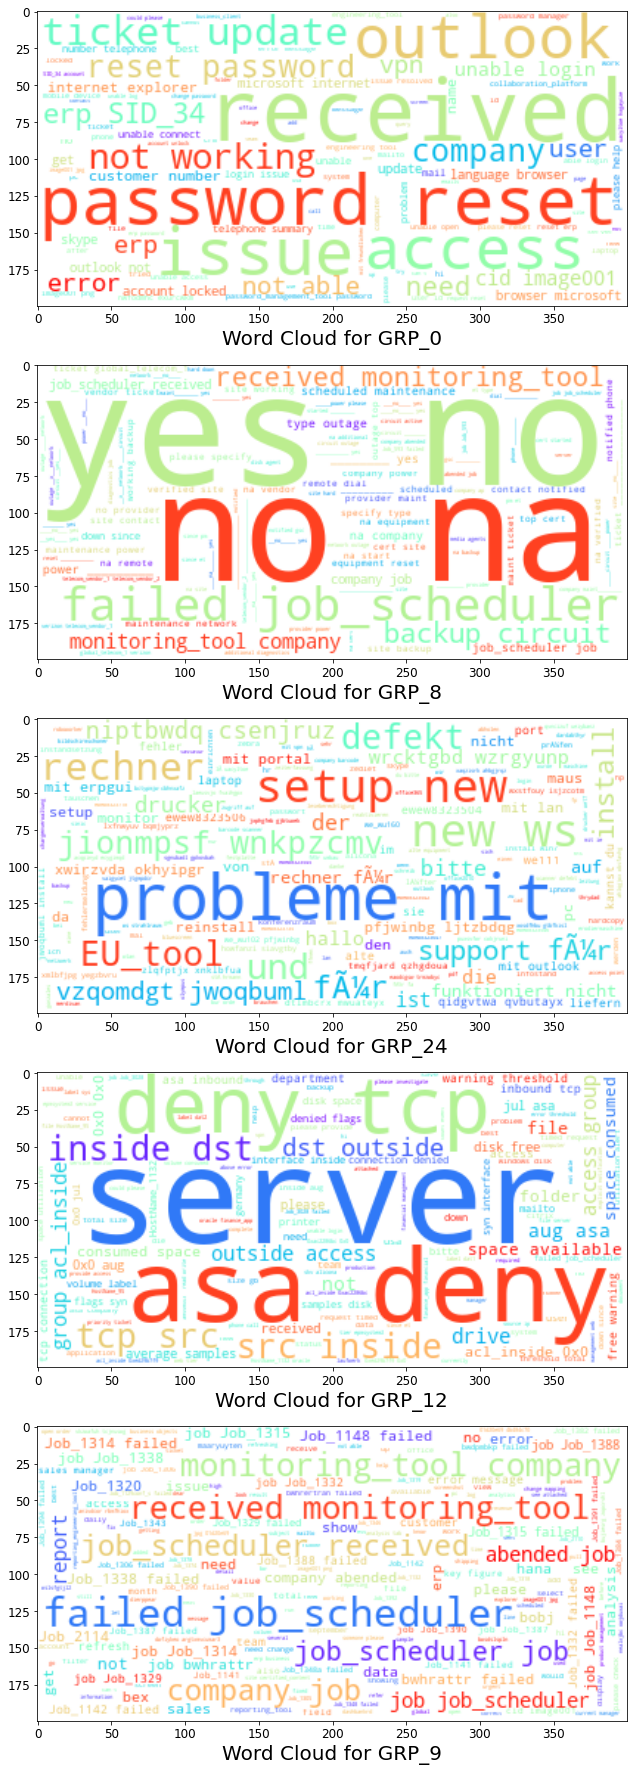

In [ ]:
# Word cloud visualisations for the top 5 groups, before text processing
def wordcloud(group):
    desc_text = inc_df[inc_df['Assignment_Group'] == group]
    desc_text_grouped = " ".join(text for text in desc_text['Description'])
    wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white', 
                          colormap='rainbow', random_state=2020).generate(desc_text_grouped)
    
    return wordcloud

fig, axes = plt.subplots(5, figsize=(15,10))

for i, ax in enumerate(axes.flatten()):
    axes[i].imshow(wordcloud(target_counts['Assignment_Group'][i]), interpolation='bilinear')
    axes[i].set_xlabel(xlabel='Word Cloud for %s' %(target_counts['Assignment_Group'][i]), fontsize=20)
    fig.subplots_adjust(top=2.5)

Just on a glance at the above, we can see that for GRP_24, the words do not seem to be in English, they are reported in German language. Hence, this seems to be the odd man out from other incidents. Let's randomly check with a German phrase whether it is present in any other groups later on. Let us also check Group_17 word cloud

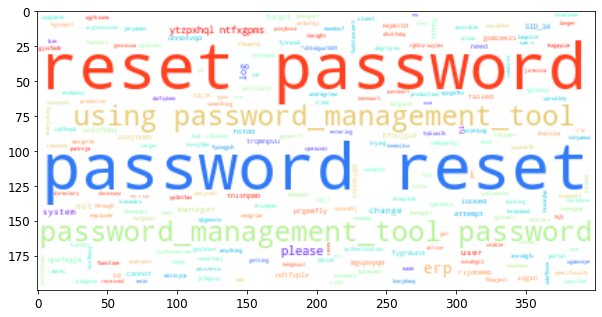

In [ ]:
# Visualising WordCloud for GRP_17, to check what are the most common issues

wc = wordcloud('GRP_17')
plt.imshow(wc, interpolation = 'bilinear')

Here we see that almost all of the incidents are related to password reset. So we can move the password reset incidents from GRP_0 to GRP_17 to have adequate data in GRP_17. Let's check which other groups have password reset in their description column

In [ ]:
pwd_reset_df = inc_df[inc_df['Description'].str.contains(r'password reset')]
print('Assignment Groups with incidents description containing as password reset :')
print(pwd_reset_df['Assignment_Group'].value_counts())
print('\nTotal number of incidents in each of the above groups :')
inc_df[inc_df['Assignment_Group'].isin(pwd_reset_df['Assignment_Group'])]['Assignment_Group'].value_counts()

Assignment Groups with incidents description containing as password reset :
GRP_0     219
GRP_17     68
GRP_2       4
GRP_7       3
GRP_12      1
Name: Assignment_Group, dtype: int64

Total number of incidents in each of the above groups :


GRP_0     3426
GRP_12     256
GRP_2      241
GRP_7       68
GRP_17      68
Name: Assignment_Group, dtype: int64

In [ ]:
# Updating the Assignment group as GRP_17 for all incidents related to password reset

inc_df.loc[inc_df.index.isin(pwd_reset_df.index), 'Assignment_Group'] = \
inc_df.loc[inc_df.index.isin(pwd_reset_df.index), 'Assignment_Group'].apply(lambda x : 'GRP_17')

grp_17 = inc_df[inc_df['Assignment_Group'] == 'GRP_17']['Assignment_Group']
print('Number of password reset incidents in GRP_17 after update : ', grp_17.count())

Number of password reset incidents in GRP_17 after update :  295


###Language Translation###

Let's try to classify what are the various languages in which the incidents are reported in the dataset

In [ ]:
!pip install langid

     |████████████████████████████████| 1.9MB 2.9MB/s 
  Created wheel for langid: filename=langid-1.1.6-cp36-none-any.whl size=1941190 sha256=1671e0b563b1eb4d5f5ea56527f5cecc1702b6c0b5a49ceae09be8f0b72efedc
  Stored in directory: /root/.cache/pip/wheels/29/bc/61/50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


In [ ]:
import langid

# Language id for each description
langids = inc_df['Description'].apply(langid.classify)
# Gets the language label alone
langs = langids.apply(lambda tuple : tuple[0])
print('Number of detected languages in our dataset :', langs.nunique())
print('Below are these languages:\n', langs.unique())

Number of detected languages in our dataset : 50
Below are these languages:
 ['en' 'da' 'fr' 'it' 'nb' 'br' 'lt' 'ca' 'es' 'de' 'qu' 'sv' 'lb' 'nl'
 'sq' 'no' 'af' 'eu' 'zh' 'id' 'an' 'se' 'mg' 'la' 'jv' 'fi' 'sw' 'cy'
 'ro' 'tl' 'rw' 'zu' 'pl' 'lo' 'mt' 'et' 'lv' 'bs' 'ko' 'tr' 'ht' 'fo'
 'pt' 'hr' 'xh' 'nn' 'sl' 'ms' 'is' 'oc']


In [ ]:
print("Estimated percentage of incidents in English language:", (round(sum(langs=="en")/len(langs)*100, 2)))
print("Estimated percentage of incidents in other languages:", (round(sum(langs!="en")/len(langs)*100, 2)))

Estimated percentage of incidents in English language: 85.17
Estimated percentage of incidents in other languages: 14.83


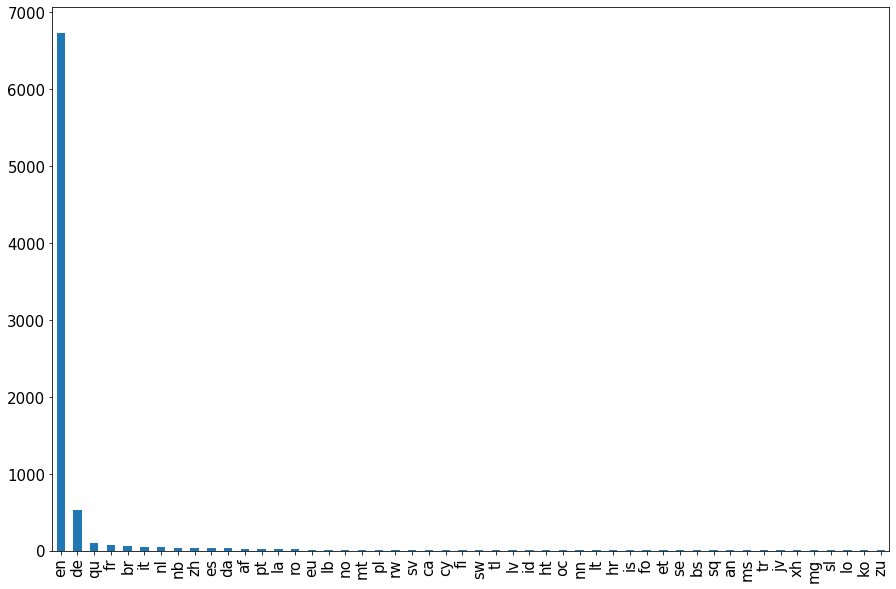

In [ ]:
# Plotting a bar chart to understand the distribution of languages across the incidents
langs_df = pd.DataFrame(langs)
langs_count = langs_df['Description'].value_counts()
langs_count.plot.bar(figsize=(15, 10), fontsize=15)

Here we can clearly see that the incidents are in majority in English language, followed by German, and others.

If we leave the languages other than English as it is, then the model might not be able to recognize and predict for other languages. Hence we can convert those languages to English, so as to have one uniform language, before model building.


In [ ]:
#installing googletrans for language conversion
!pip install googletrans

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 931kB 8.5MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=1dc71a5d1aeac2c2a0dfad8209e7a5faabda5f345ccab9eb24938675dfe09a1b
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=4a1056455c39867cd84ffb1d38b10ef6ce58f4f5e33cb724c8de9057531ed0a0
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
# Conversion of other languages to English using Google Translator API
translated_desc = []
import copy
from time import time
from googletrans import Translator
st = time()
for index, row in inc_df.iterrows():
    translator = Translator()
    newrow = copy.deepcopy(row)
    try:
        translation = translator.translate(row['Description'], dest='en')
        newrow['Translated'] = translation.text
    except Exception as e:
        continue
    translated_desc.append(newrow['Translated'])
et = time()
timediff_gt = np.round((et - st) / 60, 2)
print('Language Translation Done in %0.2f m!' %(timediff_gt))

Language Translation Done in 22.94 m!


In [ ]:
# Creating a new dataframe after translation
inct_df = inc_df.copy()
inct_df['Translated_Desc'] = pd.Series(translated_desc)

In [ ]:
print('Data with new column of translated description\n')
inct_df.head()

Data with new column of translated description



,Description,Assignment_Group,Translated_Desc
0,login issue -verified user details.(employee# ...,GRP_0,login issue -verified user details.(employee# ...
1,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn \r\n\r\nreceived from: eylq...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page unable to access...,GRP_0,unable to access hr_tool page unable to access...
4,skype error skype error,GRP_0,skype error skype error


Checking the percentage of other languages after applying language translation

In [ ]:
# Language id for each description
langids1 = inct_df['Translated_Desc'].apply(langid.classify)
# Gets the language label alone
langs1 = langids1.apply(lambda tuple : tuple[0])
print('Number of detected languages in our dataset :', langs1.nunique())
print('Below are these languages:\n', langs1.unique())

Number of detected languages in our dataset : 50
Below are these languages:
 ['en' 'da' 'fr' 'it' 'nb' 'br' 'lt' 'ca' 'es' 'de' 'qu' 'sv' 'lb' 'nl'
 'sq' 'no' 'af' 'sl' 'hy' 'id' 'la' 'eu' 'an' 'se' 'mg' 'fi' 'sw' 'ro'
 'mt' 'rw' 'zu' 'pl' 'lo' 'cy' 'et' 'lv' 'zh' 'ko' 'tr' 'ht' 'fo' 'pt'
 'xh' 'jv' 'tl' 'nn' 'oc' 'is' 'hr' 'bs']


In [ ]:
print("Estimated percentage of incidents in English language after translation:", (round(sum(langs1=="en")/len(langs1)*100, 2)))
print("Estimated percentage of incidents in other languages after translation:", (round(sum(langs1!="en")/len(langs1)*100, 2)))

Estimated percentage of incidents in English language after translation: 91.52
Estimated percentage of incidents in other languages after translation: 8.48


Applying the Translation Again

In [ ]:
# Conversion of other languages to English using Google Translator API
translated_desc = []
import copy
from time import time
from googletrans import Translator
st = time()
for index, row in inct_df.iterrows():
    translator = Translator()
    newrow = copy.deepcopy(row)
    try:
        translation = translator.translate(row['Translated_Desc'], dest='en')
        newrow['Translated'] = translation.text
    except Exception as e:
        continue
    translated_desc.append(newrow['Translated'])
et = time()
timediff_gt = np.round((et - st) / 60, 2)
print('Language Translation Done in %0.2f m!' %(timediff_gt))

Language Translation Done in 22.37 m!


In [ ]:
# Creating a new dataframe after translation
inct_df = inct_df.copy()
inct_df['Translated_Desc'] = pd.Series(translated_desc)

In [ ]:
print('Data with new column of translated description\n')
inct_df.head()

Data with new column of translated description



,Description,Assignment_Group,Translated_Desc
0,login issue -verified user details.(employee# ...,GRP_0,login issue -verified user details.(employee# ...
1,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn \r\n\r\nreceived from: eylq...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page unable to access...,GRP_0,unable to access hr_tool page unable to access...
4,skype error skype error,GRP_0,skype error skype error


In [ ]:
# Language id for each description
langids2 = inct_df['Translated_Desc'].apply(langid.classify)
# Gets the language label alone
langs2 = langids2.apply(lambda tuple : tuple[0])
print('Number of detected languages in our dataset :', langs2.nunique())
print('Below are these languages:\n', langs2.unique())

Number of detected languages in our dataset : 50
Below are these languages:
 ['en' 'da' 'fr' 'it' 'nb' 'br' 'lt' 'ca' 'es' 'de' 'qu' 'sv' 'lb' 'nl'
 'sq' 'no' 'af' 'sl' 'hy' 'id' 'la' 'eu' 'an' 'se' 'mg' 'fi' 'sw' 'ro'
 'mt' 'rw' 'zu' 'pl' 'lo' 'cy' 'et' 'lv' 'zh' 'ko' 'tr' 'ht' 'fo' 'pt'
 'xh' 'jv' 'tl' 'nn' 'oc' 'is' 'hr' 'bs']


In [ ]:
print("Estimated percentage of incidents in English language after translation:", (round(sum(langs2=="en")/len(langs2)*100, 2)))
print("Estimated percentage of incidents in other languages after translation:", (round(sum(langs2!="en")/len(langs2)*100, 2)))

Estimated percentage of incidents in English language after translation: 91.54
Estimated percentage of incidents in other languages after translation: 8.46


We can see that even after applying the translation or the second time, the percentage of other languages still remain 8.53%. Hence we are deciding to proceed with this dataset for our further model building

##Text Pre-processing



1.   Convert each sentence in the description from uppercase to lowercase
2.   Remove HTML tags
3.   Remove punctuations
4.   Remove numbers
5.   Remove 'received from' phrase
6.   Remove stopwords
7.   Normalisation using lemmatizer






In [ ]:
#importing necessary libraries for text pre processing
import re
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function to convert NLTK tag to wordnet tag - This tagging is needed for wordnetlemmatizer
def nltk_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    if nltk_tag.startswith('V'):
        return wordnet.VERB
    if nltk_tag.startswith('N'):
        return wordnet.NOUN
    if nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [ ]:

# Function to lemmatize each description - converting different versions of a word to its original lemma form
def lemmatize_desc(desc):
    tokenized_desc = word_tokenize(desc)
    tokenized_desc = [token for token in tokenized_desc if token not in custom_stopwords]
    nltk_tagged = pos_tag(tokenized_desc)
    wordnet_tagged = map(lambda x: (x[0], nltk_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_desc = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_desc.append(word)
        else:
            lemmatized_desc.append(lemmatizer.lemmatize(word))
    return " ".join(lemmatized_desc)

In [ ]:
# Function to preprocess the unprocessed description
def preprocess_desc(text):
    desc = text.lower() #convert text to lowercase
    html = re.compile(r'<.*?>') #Remove HTML tags
    desc = re.sub(html, '', desc)
    desc = re.sub(r'_', ' ', desc) # Remove underscore
    desc = re.sub(r'[^\w\s]',' ', desc) #Remove puctuations
    desc = re.sub(r'[0-9]', '', desc) # Remove numbers
    desc = re.sub(r'received from', '', desc) # Remove 'received from' phrase
    desc = re.sub(r' {2,}', " ", desc, flags=re.MULTILINE) # Convert multiple spaces to a single space
    desc = desc.replace('`',"'")
    desc = desc.strip() # Remove unwanted spaces
    return desc

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
cleansed_text = []
st = time()
for desc in inct_df['Translated_Desc']:
    preprocessed_desc = preprocess_desc(desc)
    lemmatized_desc = lemmatize_desc(preprocessed_desc)
    cleansed_text.append(lemmatized_desc)
et = time()
timediff_pp = np.round((et - st) / 60, 2)
print('Description preprocessed, lemmatized, and tokens created in %0.2f m!' %(timediff_pp))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Description preprocessed, lemmatized, and tokens created in 0.32 m!


In [ ]:
# Adding the cleansed text to the dataset
inct_df['Cleansed_Desc'] = pd.Series(cleansed_text)

In [ ]:
inct_df.head()

,Description,Assignment_Group,Translated_Desc,Cleansed_Desc
0,login issue -verified user details.(employee# ...,GRP_0,login issue -verified user details.(employee# ...,login issue verified user detail employee mana...
1,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,outlook hmjdrvpb komuaywn team meeting skype m...
2,cant log in to vpn \r\n\r\nreceived from: eylq...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,cant log vpn eylqgodm ybqkwiam hi not log vpn ...
3,unable to access hr_tool page unable to access...,GRP_0,unable to access hr_tool page unable to access...,unable access hr tool page unable access hr to...
4,skype error skype error,GRP_0,skype error skype error,skype error skype error


In [ ]:
# Saving the cleansed data to excel
inct_df.to_excel(r'/content/drive/My Drive/Cleansed_Raw_Data.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
# Reading the cleansed input data
inct_df = pd.read_excel(r'/content/drive/My Drive/Cleansed_Raw_Data.xlsx')

In [ ]:
# Checking for any null values after cleansing

inct_df.isna().sum()

Unnamed: 0          0
Description         0
Assignment_Group    0
Translated_Desc     0
Cleansed_Desc       1
dtype: int64

In [ ]:

# Drop the null values
inct_df.dropna(axis=0, subset=['Cleansed_Desc'], inplace=True)
inct_df.isna().sum()

Unnamed: 0          0
Description         0
Assignment_Group    0
Translated_Desc     0
Cleansed_Desc       0
dtype: int64

##Applying Machine Learning Models

For ML Model testing, We have used 2 approaches, each 2 Methods of Vectorization

Below are the 2 approaches:

1. Use Raw data without combining groups and without using Random Oversampling

2. Combining the groups to 54 groups in target column without using Random Oversampling

2 Methods for Vectorization are:

1. One Hot Vectorization of the words
2. TFIDF Vectorization

Hence there are total of 4 combinations.

Also the Machine Learning Models we have used as Text Classifiers are:

1. Logistic Regression

2. Naive Bayes

3. SVM

4. Random Forest Classifier

5. KNN Classifier

##Approach 1: Use Raw data without combining groups and without using Random Oversampling

In [ ]:
# Creating X and y variables

from sklearn.model_selection import train_test_split

X_data=inct_df['Cleansed_Desc']
y_data = inct_df['Assignment_Group']

In [ ]:
# Importing the libraries required for Data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Vectorize the Words:
In this project we have used 2 methods for vectorizing the words
1. One Hot encoding of both X and Y Variables
2. TFIDF Vectorization of X variable

###1. One hot encoding method

In [ ]:
# Creating the Bag of Words model 
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
X_data1=X_data
word2count = {} 
for data in X_data1: 
    words = nltk.word_tokenize(data)     

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Printing sample words
words

['different',
 'program',
 'not',
 'opened',
 'several',
 'pc',
 'different',
 'program',
 'not',
 'opened',
 'several',
 'pc',
 'area',
 'cnc']

In [ ]:
# Applying Label Encoder for the descriptions
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(X_data1)
print(integer_encoded)

[2696 3633  567 ... 6365 2764 1076]


In [ ]:
# Applying One Hot encoding to convert to binary
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print('Shape of the translated description after applying one hot encoding : ',onehot_encoded.shape)

Shape of the translated description after applying one hot encoding :  (7904, 6734)


In [ ]:
# Splitting the dataset into train, validation and test sets
from sklearn.model_selection import train_test_split
# Intermediate training set and test set
x_train, x_test, y_train, y_test = train_test_split(onehot_encoded, y_data,test_size=0.20, random_state=2018)
# Final training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2018)

In [ ]:
print('Training dataset : ')
print(x_train.shape, y_train.shape)
print('Validation dataset : ')
print(x_val.shape, y_val.shape)
print('Test dataset : ')
print(x_test.shape, y_test.shape)

Training dataset : 
(4742, 6734) (4742,)
Validation dataset : 
(1581, 6734) (1581,)
Test dataset : 
(1581, 6734) (1581,)


Model Building

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time

In [ ]:
st = time()
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_train, y_train)
et = time()
timediff_lr = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_lr))

Training completed in 1.35 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(lr.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(lr.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(lr.score(x_test, y_test) * 100))

Training accuracy : 45.68%
Validation accuracy : 45.48%
Testing accuracy : 47.31%


In [ ]:
score_val_lr = np.round(lr.score(x_val, y_val) * 100, 2)
score_test_lr = np.round(lr.score(x_test, y_test) * 100, 2)

2. Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print('Training accuracy : %0.2f%%'  %(nb.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(nb.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(nb.score(x_test, y_test) * 100))

Training accuracy : 44.79%
Validation accuracy : 44.72%
Testing accuracy : 45.79%


In [ ]:
#Tuning with hyper parameters
parameters = {'alpha' : [1, 0.01, 0.02, 0.001, 0.0001, 0.05, 0.003, 0.0002]}

st = time()
nb = GridSearchCV(MultinomialNB(), parameters, cv=5)
nb.fit(x_train, y_train)
et = time()
timediff_nb = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_nb))

Training completed in 0.25 m


In [ ]:
print('Best alpha value : ', nb.best_params_['alpha'])
print('Training accuracy after model tuning : %0.2f%%'  %(nb.score(x_train, y_train) * 100))
print('Validation accuracy after model tuning : %0.2f%%'  %(nb.score(x_val, y_val) * 100))
print('Testing accuracy after model tuning : %0.2f%%'  %(nb.score(x_test, y_test) * 100))

Best alpha value :  0.01
Training accuracy after model tuning : 95.17%
Validation accuracy after model tuning : 46.81%
Testing accuracy after model tuning : 48.70%


In [ ]:
score_val_nb = np.round(nb.score(x_val, y_val) * 100, 2)
score_test_nb = np.round(nb.score(x_test, y_test) * 100, 2)

3. Support Vector Machines

In [ ]:
from sklearn.svm import LinearSVC
st = time()
svc = LinearSVC(C=1.5)
svc.fit(x_train, y_train)
et = time()
timediff_svc = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_svc))

Training completed in 0.02 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(svc.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(svc.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(svc.score(x_test, y_test) * 100))

Training accuracy : 95.23%
Validation accuracy : 46.81%
Testing accuracy : 48.83%


In [ ]:
score_val_svc = np.round(svc.score(x_val, y_val) * 100, 2)
score_test_svc = np.round(svc.score(x_test, y_test) * 100, 2)

4. Random Forest Classifier

In [ ]:
st = time()
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
et = time()
timediff_rf = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_rf))

Training completed in 1.10 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(rf.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(rf.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(rf.score(x_test, y_test) * 100))

Training accuracy : 94.98%
Validation accuracy : 46.81%
Testing accuracy : 48.77%


In [ ]:
score_val_rf = np.round(rf.score(x_val, y_val) * 100, 2)
score_test_rf = np.round(rf.score(x_test, y_test) * 100, 2)

5. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
st = time()
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
et = time()
timediff_knn = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_knn))

Training completed in 0.06 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(knn.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(knn.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(knn.score(x_test, y_test) * 100))

Training accuracy : 48.42%
Validation accuracy : 44.91%
Testing accuracy : 46.81%


In [ ]:
score_val_knn = np.round(knn.score(x_val, y_val) * 100, 2)
score_test_knn = np.round(knn.score(x_test, y_test) * 100, 2)

Final numbers for approach 1 with one hot encoding

In [ ]:
model_df = pd.DataFrame({'Algorithm' : ['Logistic Regression', 'Multinomial NB', 'Linear SVC', 'Random Forest', 'KNN'],
                         'Validation Accuracy(%)' : [score_val_lr, score_val_nb, score_val_svc, score_val_rf, score_val_knn],
                         'Test Accuracy(%)' : [score_test_lr, score_test_nb, score_test_svc, score_test_rf, score_test_knn],
                         'Total Runtime(m)' : [timediff_lr, timediff_nb, timediff_svc, timediff_rf, timediff_knn]})
model_df

,Algorithm,Validation Accuracy(%),Test Accuracy(%),Total Runtime(m)
0,Logistic Regression,45.48,47.31,1.11
1,Multinomial NB,46.81,48.70,0.28
2,Linear SVC,46.81,48.83,0.01
3,Random Forest,46.81,48.77,1.82
4,KNN,44.91,46.81,0.08


##2. TFIDF vectorization

In [ ]:
# Printing the original descriptions
X_data

0       login issue verified user detail employee mana...
1       outlook hmjdrvpb komuaywn team meeting skype m...
2       cant log vpn eylqgodm ybqkwiam hi not log vpn ...
3       unable access hr tool page unable access hr to...
4                                 skype error skype error
                              ...                        
7900    email not coming zz mail avglmrts vhqmtiua goo...
7901    telephony software issue telephony software issue
7902    vip window password reset tifpdchb pedxruyf vi...
7903    machine nã estã funcionando unable access mach...
7904    different program not opened several pc differ...
Name: Cleansed_Desc, Length: 7904, dtype: object

In [ ]:
# Tfidf Vectorizer will convert each word in a description to its weighted frequency across all of the descriptions

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df = 5) # Ignore the words with document frequency less than 5
x_tf = vectorizer.fit_transform(X_data)
print('Number of columns after TF-IDF vectorization : ', x_tf.shape[1])

Number of columns after TF-IDF vectorization :  2593


In [ ]:
# Mapping words as column names to the generated sparse matrix
x_tf = x_tf.toarray()  # Converting sparse matrix to array
cols = vectorizer.get_feature_names()  # Retrieving the column names
x_tf_df = pd.DataFrame(x_tf, columns=cols)

In [ ]:
x_tf_df.head()

,aa,ab,abap,abended,ability,able,aborted,aborting,above,absolutely,ac,acc,accept,accepted,accepting,acces,access,accessed,accessible,accessing,according,accordingly,account,accounting,acct,ace,ack,acl,across,action,activate,activated,activation,active,activesync,activity,actual,actually,ad,adapter,...,æ³,æµ,æœ,æš,æž,æˆ,ç²,ç³,çº,ç¼,ç½,çœ,çš,è½,è¾,èƒ½å¼,èƒ½åœ,èƒ½ç,èƒ½è,éšœ,ï¼,ï¼ÿ,ï¼œä,ï¼œå,ï¼œæ,ï¼œè,ï¼š,ðµð½ð,ÿå,œå,œç,œé,šä,šçÿ,šçš,žä,žæ,žæž,žé,ˆå
0,0.0,0.0,0.0,0.0,0.0,0.156288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20885,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training and Testing data preparation

In [ ]:
 #Splitting the dataset into train, validation and test sets

from sklearn.model_selection import train_test_split

# Intermediate training set and test set
x_train, x_test, y_train, y_test = train_test_split(x_tf_df, y_data, 
                                                    test_size=0.20, random_state=2018)

# Final training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2018)

In [ ]:
print('Training dataset : ')
print(x_train.shape, y_train.shape)
print('Validation dataset : ')
print(x_val.shape, y_val.shape)
print('Test dataset : ')
print(x_test.shape, y_test.shape)

Training dataset : 
(4742, 2593) (4742,)
Validation dataset : 
(1581, 2593) (1581,)
Test dataset : 
(1581, 2593) (1581,)


Model Building

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time

In [ ]:
st = time()
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_train, y_train)
et = time()
timediff_lr = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_lr))

Training completed in 0.49 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(lr.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(lr.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(lr.score(x_test, y_test) * 100))

Training accuracy : 62.19%
Validation accuracy : 58.25%
Testing accuracy : 59.52%


In [ ]:
score_val_lr = np.round(lr.score(x_val, y_val) * 100, 2)
score_test_lr = np.round(lr.score(x_test, y_test) * 100, 2)

2. Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print('Training accuracy : %0.2f%%'  %(nb.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(nb.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(nb.score(x_test, y_test) * 100))

Training accuracy : 53.16%
Validation accuracy : 51.80%
Testing accuracy : 52.06%


In [ ]:
# Tuning with hyper parameters

parameters = {'alpha' : [1, 0.01, 0.02, 0.001, 0.05, 0.003, 0.0002]}

st = time()
nb = GridSearchCV(MultinomialNB(), parameters, cv=5)
nb.fit(x_train, y_train)
et = time()
timediff_nb = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_nb))

Training completed in 0.10 m


In [ ]:
print('Best alpha value : ', nb.best_params_['alpha'])

Best alpha value :  0.02


In [ ]:
print('Training accuracy after model tuning : %0.2f%%'  %(nb.score(x_train, y_train) * 100))
print('Validation accuracy after model tuning : %0.2f%%'  %(nb.score(x_val, y_val) * 100))
print('Testing accuracy after model tuning : %0.2f%%'  %(nb.score(x_test, y_test) * 100))

Training accuracy after model tuning : 82.98%
Validation accuracy after model tuning : 63.57%
Testing accuracy after model tuning : 63.95%


In [ ]:
score_val_nb = np.round(nb.score(x_val, y_val) * 100, 2)
score_test_nb = np.round(nb.score(x_test, y_test) * 100, 2)

3. Support Vector Machines

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
st = time()
parameters = {4.0}
svc = LinearSVC(C=5.0)
svc.fit(x_train, y_train)
et = time()
timediff_svc = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_svc))

Training completed in 0.01 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(svc.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(svc.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(svc.score(x_test, y_test) * 100))

Training accuracy : 93.06%
Validation accuracy : 62.24%
Testing accuracy : 64.83%


In [ ]:
score_val_svc = np.round(svc.score(x_val, y_val) * 100, 2)
score_test_svc = np.round(svc.score(x_test, y_test) * 100, 2)

4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
st = time()
#rf = RandomForestClassifier(n_estimators=350, max_depth=30, max_features='log2', criterion='entropy', random_state=1)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
et = time()
timediff_rf = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_rf))

Training completed in 0.18 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(rf.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(rf.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(rf.score(x_test, y_test) * 100))

Training accuracy : 94.81%
Validation accuracy : 60.59%
Testing accuracy : 63.06%


In [ ]:
score_val_rf = np.round(rf.score(x_val, y_val) * 100, 2)
score_test_rf = np.round(rf.score(x_test, y_test) * 100, 2)

5. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
st = time()
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
et = time()
timediff_knn = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_knn))

Training completed in 0.03 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(knn.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(knn.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(knn.score(x_test, y_test) * 100))

Training accuracy : 62.46%
Validation accuracy : 53.00%
Testing accuracy : 54.71%


In [ ]:
score_val_knn = np.round(knn.score(x_val, y_val) * 100, 2)
score_test_knn = np.round(knn.score(x_test, y_test) * 100, 2)

Final numbers for approach 1 with TF-IDF





In [ ]:
model_df = pd.DataFrame({'Algorithm' : ['Logistic Regression', 'Multinomial NB', 'Linear SVC', 'Random Forest', 'KNN'],
                         'Validation Accuracy(%)' : [score_val_lr, score_val_nb, score_val_svc, score_val_rf, score_val_knn],
                         'Test Accuracy(%)' : [score_test_lr, score_test_nb, score_test_svc, score_test_rf, score_test_knn],
                         'Total Runtime(m)' : [timediff_lr, timediff_nb, timediff_svc, timediff_rf, timediff_knn]})
model_df

,Algorithm,Validation Accuracy(%),Test Accuracy(%),Total Runtime(m)
0,Logistic Regression,58.25,59.52,0.49
1,Multinomial NB,63.57,63.95,0.10
2,Linear SVC,62.24,64.83,0.01
3,Random Forest,60.59,63.06,0.18
4,KNN,44.91,46.81,0.03


##Approach 2: Combining the groups to 54 and considering them as targets

We have combined the groups on the basis:

1. Combine the minority groups only those having less than 10 tickets assigned

2. No oversampling 

In [ ]:
# Creating a fresh dataframe to work on the imbalanced data

clean_imb_df = inct_df[['Cleansed_Desc', 'Assignment_Group']]
print(clean_imb_df.head())
print(clean_imb_df.shape)

                                       Cleansed_Desc Assignment_Group
0  login issue verified user detail employee mana...            GRP_0
1  outlook hmjdrvpb komuaywn team meeting skype m...            GRP_0
2  cant log vpn eylqgodm ybqkwiam hi not log vpn ...            GRP_0
3  unable access hr tool page unable access hr to...            GRP_0
4                            skype error skype error            GRP_0
(7904, 2)


In [ ]:
# Creating a separate dataframe to get the incident counts for each group, then joining with the original dataframe

clean_imb_vc = clean_imb_df.groupby('Assignment_Group').size().sort_values(ascending=False).reset_index(name='Counts')
clean_imb_df = pd.merge(clean_imb_df, clean_imb_vc, how='left', on='Assignment_Group')
clean_imb_df.head()

,Cleansed_Desc,Assignment_Group,Counts
0,login issue verified user detail employee mana...,GRP_0,3206
1,outlook hmjdrvpb komuaywn team meeting skype m...,GRP_0,3206
2,cant log vpn eylqgodm ybqkwiam hi not log vpn ...,GRP_0,3206
3,unable access hr tool page unable access hr to...,GRP_0,3206
4,skype error skype error,GRP_0,3206


In [ ]:
# Combining the minority groups with tickets less than 10
# Groups with tickets 1 & 4 => GRP_A
# Groups with tikets 2 => GRP_B
# Groups with tickets 3 => GRP_C
# Groups with tickets 5 & 6 => GRP_D
# Groups with tickets 8 & 9 => GRP_E

clean_imb_df.loc[clean_imb_df['Counts'] == 1, ['Assignment_Group']] = 'GRP_A'
clean_imb_df.loc[clean_imb_df['Counts'] == 4, ['Assignment_Group']] = 'GRP_A'
clean_imb_df.loc[clean_imb_df['Counts'] == 2, ['Assignment_Group']] = 'GRP_B'
clean_imb_df.loc[clean_imb_df['Counts'] == 3, ['Assignment_Group']] = 'GRP_C'
clean_imb_df.loc[clean_imb_df['Counts'] == 5, ['Assignment_Group']] = 'GRP_D'
clean_imb_df.loc[clean_imb_df['Counts'] == 6, ['Assignment_Group']] = 'GRP_D'
clean_imb_df.loc[clean_imb_df['Counts'] == 8, ['Assignment_Group']] = 'GRP_E'
clean_imb_df.loc[clean_imb_df['Counts'] == 9, ['Assignment_Group']] = 'GRP_E'

In [ ]:
print('Total number of groups after combining minority groups having less than 10 tickets : ', 
      clean_imb_df['Assignment_Group'].nunique())
print('Below are these groups : ')
print(clean_imb_df['Assignment_Group'].unique())

Total number of groups after combining minority groups having less than 10 tickets :  54
Below are these groups : 
['GRP_0' 'GRP_1' 'GRP_3' 'GRP_17' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8'
 'GRP_9' 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_A' 'GRP_36' 'GRP_37' 'GRP_C' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_D' 'GRP_44' 'GRP_45' 'GRP_47' 'GRP_48' 'GRP_50' 'GRP_E'
 'GRP_53' 'GRP_B' 'GRP_60' 'GRP_62' 'GRP_65']


We can see that we have reduced the number of groups from 74 to 54. Still, the dataset is imbalanced, but we will proceed with this dataset further to see how the models perform.

In [ ]:
print('checking for the null values')
clean_imb_df.isna().sum()

checking for the null values


Cleansed_Desc       0
Assignment_Group    0
Counts              0
dtype: int64

In [ ]:
clean_imb_df.to_excel(r'/content/drive/My Drive/Cleansed_imb_df.xlsx')

### 1. One Hot Encoding

In [ ]:
# Creating the Bag of Words model 
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
word2count = {} 
for data in clean_imb_df['Cleansed_Desc']: 
    words = nltk.word_tokenize(data)     

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Applying Label Encoder on the descriptions
label_encoder = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(clean_imb_df['Cleansed_Desc'])
print(integer_encoded1)

[2697 3634  567 ... 6364 2765 1077]


In [ ]:
# Applying One Hot encoding to convert labels to binary format
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded1 = integer_encoded1.reshape(len(integer_encoded1), 1)
onehot_encoded1 = onehot_encoder.fit_transform(integer_encoded1)
print(onehot_encoded1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print('Shape of the data X after applying one hot encoding : ', onehot_encoded1.shape)

Shape of the data X after applying one hot encoding :  (7904, 6733)


Training and Testing data preparation

In [ ]:
# Splitting the dataset into train, validation and test sets
from sklearn.model_selection import train_test_split
# Intermediate training set and test set
x_train, x_test, y_train, y_test = train_test_split(onehot_encoded1, clean_imb_df['Assignment_Group'],test_size=0.20, random_state=2018)
# Final training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2018)

In [ ]:
print('Training dataset : ')
print(x_train.shape, y_train.shape)
print('Validation dataset : ')
print(x_val.shape, y_val.shape)
print('Test dataset : ')
print(x_test.shape, y_test.shape)

Training dataset : 
(4742, 6733) (4742,)
Validation dataset : 
(1581, 6733) (1581,)
Test dataset : 
(1581, 6733) (1581,)


Model Building

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
st = time()
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_train, y_train)
et = time()
timediff_lr = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_lr))

Training completed in 0.88 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(lr.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(lr.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(lr.score(x_test, y_test) * 100))

Training accuracy : 45.68%
Validation accuracy : 45.48%
Testing accuracy : 47.31%


In [ ]:
score_val_lr = np.round(lr.score(x_val, y_val) * 100, 2)
score_test_lr = np.round(lr.score(x_test, y_test) * 100, 2)

2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
print('Training accuracy : %0.2f%%'  %(nb.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(nb.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(nb.score(x_test, y_test) * 100))

Training accuracy : 44.79%
Validation accuracy : 44.72%
Testing accuracy : 45.79%


In [ ]:
# Tuning with hyper parameters

parameters = {'alpha' : [1, 0.01, 0.02, 0.001, 0.0001, 0.05, 0.003, 0.0002]}

st = time()
nb = GridSearchCV(MultinomialNB(), parameters, cv=5)
nb.fit(x_train, y_train)
et = time()
timediff_nb = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_nb))

Training completed in 0.22 m


In [ ]:
print('Best alpha value : ', nb.best_params_['alpha'])

Best alpha value :  0.01


In [ ]:
print('Training accuracy after model tuning : %0.2f%%'  %(nb.score(x_train, y_train) * 100))
print('Validation accuracy after model tuning : %0.2f%%'  %(nb.score(x_val, y_val) * 100))
print('Testing accuracy after model tuning : %0.2f%%'  %(nb.score(x_test, y_test) * 100))

Training accuracy after model tuning : 95.17%
Validation accuracy after model tuning : 46.81%
Testing accuracy after model tuning : 48.70%


In [ ]:
score_val_nb = np.round(nb.score(x_val, y_val) * 100, 2)
score_test_nb = np.round(nb.score(x_test, y_test) * 100, 2)

3. Support Vector Machines

In [ ]:
from sklearn.svm import LinearSVC
st = time()
svc = LinearSVC(C=1.5)
svc.fit(x_train, y_train)
et = time()
timediff_svc = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_svc))

Training completed in 0.01 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(svc.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(svc.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(svc.score(x_test, y_test) * 100))

Training accuracy : 95.23%
Validation accuracy : 46.81%
Testing accuracy : 48.83%


In [ ]:
score_val_svc = np.round(svc.score(x_val, y_val) * 100, 2)
score_test_svc = np.round(svc.score(x_test, y_test) * 100, 2)

4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
st = time()
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
et = time()
timediff_rf = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_rf))

Training completed in 1.75 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(rf.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(rf.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(rf.score(x_test, y_test) * 100))

Training accuracy : 95.00%
Validation accuracy : 46.81%
Testing accuracy : 48.70%


In [ ]:
score_val_rf = np.round(rf.score(x_val, y_val) * 100, 2)
score_test_rf = np.round(rf.score(x_test, y_test) * 100, 2)

5. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
st = time()
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
et = time()
timediff_knn = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_knn))

Training completed in 0.08 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(knn.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(knn.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(knn.score(x_test, y_test) * 100))

Training accuracy : 48.44%
Validation accuracy : 44.91%
Testing accuracy : 46.81%


In [ ]:
score_val_knn = np.round(knn.score(x_val, y_val) * 100, 2)
score_test_knn = np.round(knn.score(x_test, y_test) * 100, 2)

Final numbers for approach 2 with One Hot Encoding

In [ ]:
model_df = pd.DataFrame({'Algorithm' : ['Logistic Regression', 'Multinomial NB', 'Linear SVC', 'Random Forest', 'KNN'],
                         'Validation Accuracy(%)' : [score_val_lr, score_val_nb, score_val_svc, score_val_rf, score_val_knn],
                         'Test Accuracy(%)' : [score_test_lr, score_test_nb, score_test_svc, score_test_rf, score_test_knn],
                         'Total Runtime(m)' : [timediff_lr, timediff_nb, timediff_svc, timediff_rf, timediff_knn]})
model_df

,Algorithm,Validation Accuracy(%),Test Accuracy(%),Total Runtime(m)
0,Logistic Regression,45.48,47.31,0.88
1,Multinomial NB,46.81,48.70,0.22
2,Linear SVC,46.81,48.83,0.01
3,Random Forest,46.81,48.70,1.75
4,KNN,44.91,46.81,0.08


###2. TF-IDF vectorization

In [ ]:
# Tfidf Vectorizer will convert each word in a description to its weighted frequency across all of the descriptions

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), min_df = 5) # Ignore the words with document frequency less than 3
x_tf = vectorizer.fit_transform(clean_imb_df['Cleansed_Desc'])
print('Number of columns after TF-IDF vectorization : ', x_tf.shape[1])

Number of columns after TF-IDF vectorization :  2593


In [ ]:
# Mapping words as column names to the generated sparse matrix

x_tf = x_tf.toarray()  # Converting sparse matrix to array
cols = vectorizer.get_feature_names()  # Retrieving the column names
x_tf_df = pd.DataFrame(x_tf, columns=cols)

x_tf_df.head()

,aa,ab,abap,abended,ability,able,aborted,aborting,above,absolutely,ac,acc,accept,accepted,accepting,acces,access,accessed,accessible,accessing,according,accordingly,account,accounting,acct,ace,ack,acl,across,action,activate,activated,activation,active,activesync,activity,actual,actually,ad,adapter,...,æ³,æµ,æœ,æš,æž,æˆ,ç²,ç³,çº,ç¼,ç½,çœ,çš,è½,è¾,èƒ½å¼,èƒ½åœ,èƒ½ç,èƒ½è,éšœ,ï¼,ï¼ÿ,ï¼œä,ï¼œå,ï¼œæ,ï¼œè,ï¼š,ðµð½ð,ÿå,œå,œç,œé,šä,šçÿ,šçš,žä,žæ,žæž,žé,ˆå
0,0.0,0.0,0.0,0.0,0.0,0.156288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20885,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training and Testing data preparation

In [ ]:
# Splitting the dataset into train, validation and test sets

from sklearn.model_selection import train_test_split

# Intermediate training set and test set
x_train, x_test, y_train, y_test = train_test_split(x_tf_df, clean_imb_df['Assignment_Group'], 
                                                    test_size=0.20, random_state=2018)

# Final training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2018)

In [ ]:
print('Training dataset : ')
print(x_train.shape, y_train.shape)
print('Validation dataset : ')
print(x_val.shape, y_val.shape)
print('Test dataset : ')
print(x_test.shape, y_test.shape)

Training dataset : 
(4742, 2593) (4742,)
Validation dataset : 
(1581, 2593) (1581,)
Test dataset : 
(1581, 2593) (1581,)


Model Building

1. Logistic Regression


In [ ]:
st = time()
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_train, y_train)
et = time()
timediff_lr = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_lr))

Training completed in 0.40 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(lr.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(lr.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(lr.score(x_test, y_test) * 100))

Training accuracy : 62.19%
Validation accuracy : 58.25%
Testing accuracy : 59.52%


In [ ]:
score_val_lr = np.round(lr.score(x_val, y_val) * 100, 2)
score_test_lr = np.round(lr.score(x_test, y_test) * 100, 2)

2. Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print('Training accuracy : %0.2f%%'  %(nb.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(nb.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(nb.score(x_test, y_test) * 100))

Training accuracy : 53.16%
Validation accuracy : 51.80%
Testing accuracy : 52.06%


In [ ]:
# Tuning with hyper parameters

parameters = {'alpha' : [1, 0.01, 0.02, 0.001, 0.0001, 0.05, 0.003, 0.0002]}

st = time()
nb = GridSearchCV(MultinomialNB(), parameters, cv=5)
nb.fit(x_train, y_train)
et = time()
timediff_nb = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_nb))

Training completed in 0.11 m


In [ ]:
print('Best alpha value : ', nb.best_params_['alpha'])

Best alpha value :  0.02


In [ ]:
print('Training accuracy after model tuning : %0.2f%%'  %(nb.score(x_train, y_train) * 100))
print('Validation accuracy after model tuning : %0.2f%%'  %(nb.score(x_val, y_val) * 100))
print('Testing accuracy after model tuning : %0.2f%%'  %(nb.score(x_test, y_test) * 100))

Training accuracy after model tuning : 83.05%
Validation accuracy after model tuning : 63.57%
Testing accuracy after model tuning : 64.01%


In [ ]:
score_val_nb = np.round(nb.score(x_val, y_val) * 100, 2)
score_test_nb = np.round(nb.score(x_test, y_test) * 100, 2)

3. Support Vector Machines

In [ ]:
st = time()
svc = LinearSVC(C=1.5)
svc.fit(x_train, y_train)
et = time()
timediff_svc = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_svc))

Training completed in 0.01 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(svc.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(svc.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(svc.score(x_test, y_test) * 100))

Training accuracy : 91.10%
Validation accuracy : 64.96%
Testing accuracy : 66.22%


In [ ]:
score_val_svc = np.round(svc.score(x_val, y_val) * 100, 2)
score_test_svc = np.round(svc.score(x_test, y_test) * 100, 2)

4. Random Forest Classifier

In [ ]:
st = time()
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
et = time()
timediff_rf = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_rf))

Training completed in 0.15 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(rf.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(rf.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(rf.score(x_test, y_test) * 100))

Training accuracy : 94.81%
Validation accuracy : 60.91%
Testing accuracy : 63.76%


In [ ]:
score_val_rf = np.round(rf.score(x_val, y_val) * 100, 2)
score_test_rf = np.round(rf.score(x_test, y_test) * 100, 2)

5. KNN Classifier

In [ ]:
st = time()
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
et = time()
timediff_knn = np.round((et - st) / 60, 2)
print('Training completed in %0.2f m' %(timediff_knn))

Training completed in 0.03 m


In [ ]:
print('Training accuracy : %0.2f%%'  %(knn.score(x_train, y_train) * 100))
print('Validation accuracy : %0.2f%%'  %(knn.score(x_val, y_val) * 100))
print('Testing accuracy : %0.2f%%'  %(knn.score(x_test, y_test) * 100))

Training accuracy : 62.46%
Validation accuracy : 53.00%
Testing accuracy : 54.71%


In [ ]:
score_val_knn = np.round(knn.score(x_val, y_val) * 100, 2)
score_test_knn = np.round(knn.score(x_test, y_test) * 100, 2)

Final numbers for approach 2 with TFIDF

In [ ]:
model_df = pd.DataFrame({'Algorithm' : ['Logistic Regression', 'Multinomial NB', 'Linear SVC', 'Random Forest', 'KNN'],
                         'Validation Accuracy(%)' : [score_val_lr, score_val_nb, score_val_svc, score_val_rf, score_val_knn],
                         'Test Accuracy(%)' : [score_test_lr, score_test_nb, score_test_svc, score_test_rf, score_test_knn],
                         'Total Runtime(m)' : [timediff_lr, timediff_nb, timediff_svc, timediff_rf, timediff_knn]})
model_df

,Algorithm,Validation Accuracy(%),Test Accuracy(%),Total Runtime(m)
0,Logistic Regression,58.25,59.52,0.40
1,Multinomial NB,63.57,64.01,0.11
2,Linear SVC,64.96,66.22,0.01
3,Random Forest,60.91,63.76,0.15
4,KNN,53.00,54.71,0.03


#**Deep Learning Approach**#

In Deep Learning, we are using second approach of the above data where we have grouped the categories in target variable(Assignment_Group) to 54 categories or 54 groups without any over sampling

In [ ]:
#Loading the drive again
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
# Reading the cleansed input data
deep_data = pd.read_excel(r'/content/drive/My Drive/Cleansed_imb_df.xlsx')

In [ ]:
#checking the first five rows of the cleaned data
print('First five rows of cleaned data are:\n')
deep_data.head()

First five rows of cleaned data are:



,Unnamed: 0,Cleansed_Desc,Assignment_Group,Counts
0,0,login issue verified user detail employee mana...,GRP_0,3206
1,1,outlook hmjdrvpb komuaywn team meeting skype m...,GRP_0,3206
2,2,cant log vpn eylqgodm ybqkwiam hi not log vpn ...,GRP_0,3206
3,3,unable access hr tool page unable access hr to...,GRP_0,3206
4,4,skype error skype error,GRP_0,3206


As we already have cleansed the data in Cleansed_Desc column we can remove other unnecessary columns

In [ ]:
#deleting the columns which are not required
cols=['Counts','Unnamed: 0']
deep_data.drop(columns=cols,inplace=True)

In [ ]:
#checking the columns of the data after deleting the unnecessary columns
print('Data after deleting the columns')
deep_data.head(2)

Data after deleting the columns


,Cleansed_Desc,Assignment_Group
0,login issue verified user detail employee mana...,GRP_0
1,outlook hmjdrvpb komuaywn team meeting skype m...,GRP_0


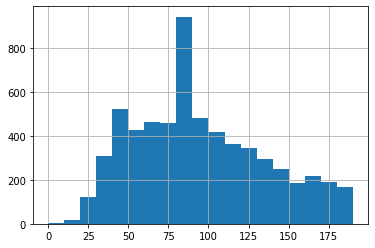

In [ ]:
#checking the length of the sentences
lens = deep_data['Cleansed_Desc'].str.len()
lens.hist(bins = np.arange(0,200,10))

In [ ]:
print('maximum length of the sentence: ',max(lens))
print('minimum length of the sentence: ',min(lens))
print('mean length of the sentence: ',np.mean(lens))

maximum length of the sentence:  6437
minimum length of the sentence:  5
mean length of the sentence:  169.78732287449392


We can see that mean length of sentences is 169.85 word counts. Hence we can keep the maximum length as 200 for padding purpose

In [ ]:
#importing all the necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM,TimeDistributed, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [ ]:
#Set Different Parameters for the model.
max_features = 8000
maxlen = 200 #as explained above ##
embedding_size = 200

In [ ]:
#checking data Types of the columns
deep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7904 entries, 0 to 7903
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cleansed_Desc     7904 non-null   object
 1   Assignment_Group  7904 non-null   object
dtypes: object(2)
memory usage: 123.6+ KB


We see that both the columns are object type. Hence we have to convert the Cleansed_Desc to string type and Assignment_Group to categorical type

In [ ]:
#converting the column Cleansed_Desc to string
deep_data.Cleansed_Desc=deep_data.Cleansed_Desc.astype(str)

In [ ]:
#Apply Keras Tokenizer
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
tokenizer.fit_on_texts(deep_data['Cleansed_Desc'])

In [ ]:
#Define X and y for your model and padding the sentences to length of 200(padded X )
X = tokenizer.texts_to_sequences(deep_data['Cleansed_Desc'])
X = pad_sequences(X, maxlen = maxlen,padding="post")
y = np.asarray(deep_data['Assignment_Group'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 7904
[ 35  15 215  13 151 163  99  31 406  13  31 258  18   7 670  13  35  87
 484 362  63  35  15 353   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
Number of Labels:  7904
GRP_0


In [ ]:
#Get the Vocabulary size
words=tokenizer.word_index

In [ ]:
# Checking the vocabulary of the Cleansed_Data
print('The unique words / Vocabulary of the Cleansed_Data is\n',words)
print('\nTotal number of unique words are : ',len(words))

The unique words / Vocabulary of the Cleansed_Data is
 {'job': 1, 'not': 2, 'no': 3, 'company': 4, 'tool': 5, 'please': 6, 'password': 7, 'yes': 8, 'na': 9, 'scheduler': 10, 'erp': 11, 'failed': 12, 'user': 13, 'access': 14, 'issue': 15, 'sid': 16, 'unable': 17, 'reset': 18, 'ticket': 19, 'error': 20, 'monitoring': 21, 'need': 22, 'hostname': 23, 'account': 24, 'outlook': 25, 'working': 26, 'site': 27, 'e': 28, 'system': 29, 'help': 30, 'name': 31, 'network': 32, 'circuit': 33, 'id': 34, 'login': 35, 'power': 36, 'problem': 37, 'â': 38, 'message': 39, 'vendor': 40, 'update': 41, 'server': 42, 'printer': 43, 'event': 44, 'x': 45, 'c': 46, 'new': 47, 'f': 48, 'down': 49, 'phone': 50, 'backup': 51, 'å': 52, 'image': 53, 'usa': 54, 'engineering': 55, 'see': 56, 'telecom': 57, 'time': 58, 'crm': 59, 'cid': 60, 'device': 61, 'outage': 62, 'able': 63, 'vpn': 64, 'order': 65, 'number': 66, 'team': 67, 'type': 68, 'up': 69, 'skype': 70, 'pc': 71, 'log': 72, 'customer': 73, 'change': 74, 'et': 7

In [ ]:
# Converting the target as on-hot encoded values, i.e.., Assignment_Group column into 54 columns
import keras
from sklearn.preprocessing import LabelEncoder
target = pd.get_dummies(y).values
print('Shape of label tensor:', target.shape)

Shape of label tensor: (7904, 54)


In [ ]:
#checking the size of vocabulary
num_words=len(tokenizer.word_index)
print ('vocabulary size=',num_words)

vocabulary size= 13907


In [ ]:
#as the vocab size is 13907, we can round the same to 13910
num_words1=13910

##Word Embedding

We have used 5 types of word embeddings applied on 3 models

5 types of Word embeddings are:

1. Embedding Layer itself

2. Glove Embeddings

3. Word2Vec Embedding

4. Universal Sentence Encoder

5. BERT Embedding

3 models with each embeddings are

1. LSTM

2. Bi-Directional LSTM

3. Self Attention Layer

Hence there are 15 models in total

###1. Word Embedding: Self Embedding

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=2020)

In [ ]:
#checking the shape of the data after splitting data
print('Shape of the training data: x:',x_train.shape,' y:',y_train.shape)
print('Shape of the test data: x:',x_test.shape,' y:',y_test.shape)

Shape of the training data: x: (6323, 200)  y: (6323, 54)
Shape of the test data: x: (1581, 200)  y: (1581, 54)


In [ ]:
# importing libraries
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, LSTM,TimeDistributed, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D

Embedding: Self Embedding

Model 1 :LSTM Model with Self Embedding

In [ ]:
model1 = Sequential()
model1.add(Embedding(num_words1,embedding_size, input_length=X.shape[1],trainable=True))
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(54, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          2782000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               168448    
_________________________________________________________________
dense (Dense)                (None, 54)                6966      
Total params: 2,957,414
Trainable params: 2,957,414
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Introducing the checkpoints, Earlystopping and ReduceLROnPlateau

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=10)
stop = EarlyStopping(monitor="loss", patience=7, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=3, min_lr=1e-6, verbose=1, mode="min")

Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy

In [ ]:
batch_size = 50
epochs = 10
history = model1.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2, callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
  9/102 [=>............................] - ETA: 1:00 - loss: 3.6785 - acc: 0.3644
Epoch 00001: loss improved from inf to 3.61604, saving model to model-3.62.h5
 19/102 [====>.........................] - ETA: 57s - loss: 3.2804 - acc: 0.3789
Epoch 00001: loss improved from 3.61604 to 3.24974, saving model to model-3.25.h5
 29/102 [=======>......................] - ETA: 51s - loss: 3.1068 - acc: 0.3876
Epoch 00001: loss improved from 3.24974 to 3.10259, saving model to model-3.10.h5
 39/102 [==========>...................] - ETA: 44s - loss: 3.0132 - acc: 0.3887
Epoch 00001: loss improved from 3.10259 to 3.00648, saving model to model-3.01.h5
 49/102 [=============>................] - ETA: 37s - loss: 2.9507 - acc: 0.3971
Epoch 00001: loss improved from 3.00648 to 2.93911, saving model to model-2.94.h5
 59/102 [================>.............] - ETA: 30s - loss: 2.9051 - acc: 0.4017
Epoch 00001: loss improved from 2.93911 to 2.90462, saving model to model-2.90.h5
 69/102 [=====

In [ ]:
#Printing the accuracy score for the model
val_acc1 = history.history['val_acc']
val_acc_lstm1=(np.round(np.max(val_acc1) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f%%' %val_acc_lstm1)
scores1 = model1.evaluate(x_test, y_test, verbose=0)
print("Accuracy of self Embedding with LSTM Model is: %.2f%%" % (scores1[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 42.37%
Accuracy of self Embedding with LSTM Model is: 41.43%


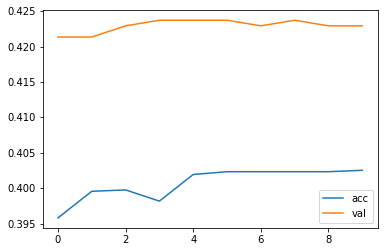

In [ ]:
#plotting epochs versus the accuracy for Training and Validation

import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['acc'],label='acc')
plt.plot(history.epoch,history.history['val_acc'],label='val')
plt.legend()

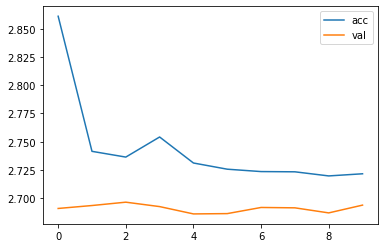

In [ ]:
#plotting epochs versus the loss for Training and Validation
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

Model 2: Bi-Directional LSTMs with Self Embedding

In [ ]:
#Model Building
model2 = Sequential()
model2.add(Embedding(num_words1,embedding_size, input_length=X.shape[1],trainable=True))
model2.add(Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2)))
model2.add(Dense(54, activation='softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 200)          2782000   
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               421200    
_________________________________________________________________
dense_1 (Dense)              (None, 54)                16254     
Total params: 3,219,454
Trainable params: 3,219,454
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Introducing the checkpoints, Earlystopping and ReduceLROnPlateau

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=10)
stop = EarlyStopping(monitor="loss", patience=15, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
#Fitting the model
batch_size = 50
epochs = 10
history = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2, callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
  9/102 [=>............................] - ETA: 1:59 - loss: 3.5167 - accuracy: 0.3600
Epoch 00001: loss improved from inf to 3.47693, saving model to model-3.48.h5
 19/102 [====>.........................] - ETA: 1:54 - loss: 3.1608 - accuracy: 0.3758
Epoch 00001: loss improved from 3.47693 to 3.14489, saving model to model-3.14.h5
 29/102 [=======>......................] - ETA: 1:41 - loss: 2.9626 - accuracy: 0.3931
Epoch 00001: loss improved from 3.14489 to 2.94558, saving model to model-2.95.h5
 39/102 [==========>...................] - ETA: 1:28 - loss: 2.8617 - accuracy: 0.4046
Epoch 00001: loss improved from 2.94558 to 2.85406, saving model to model-2.85.h5
 49/102 [=============>................] - ETA: 1:15 - loss: 2.7649 - accuracy: 0.4200
Epoch 00001: loss improved from 2.85406 to 2.75011, saving model to model-2.75.h5
 59/102 [================>.............] - ETA: 1:01 - loss: 2.6932 - accuracy: 0.4305
Epoch 00001: loss improved from 2.75011 to 2.69738, saving mo

In [ ]:
#Printing the accuracy score for the model
val_acc2 = history.history['val_accuracy']
val_acc_lstm2=(np.round(np.max(val_acc2) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f' %val_acc_lstm2)
scores2 = model2.evaluate(x_test, y_test, verbose=0)
print("Accuracy of Self Embedding with Bi-Directional LSTM: %.2f%%" % (scores2[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 61.26
Accuracy of Self Embedding with Bi-Directional LSTM: 60.53%


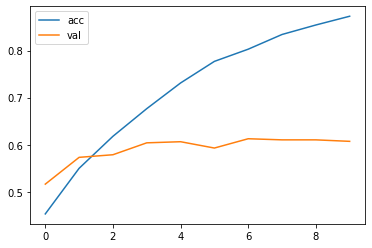

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['accuracy'],label='acc')
plt.plot(history.epoch,history.history['val_accuracy'],label='val')
plt.legend()

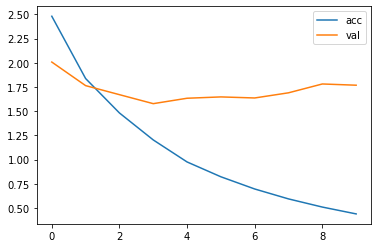

In [ ]:
#plotting epochs versus the loss for Training and Validation
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

Model 3: Self Attention Model with Self Embedding

In [ ]:
pip install keras-self-attention #installing packages

  Created wheel for keras-self-attention: filename=keras_self_attention-0.47.0-cp36-none-any.whl size=17289 sha256=013ce8716cd87b27f5b1ee8fdb10e46542a9f1171af7c4adb34020603759f5da
  Stored in directory: /root/.cache/pip/wheels/70/87/01/76c703d5401b65e323927c1fdc665f3fb143282ff67d71e859
Successfully built keras-self-attention


In [ ]:
#Model Building
from keras_self_attention import SeqSelfAttention
from keras.layers.embeddings import Embedding
from keras_self_attention import SeqWeightedAttention
model3 = Sequential()
input=keras.layers.Input(shape=(None,))
model3.add(Embedding(num_words1,embedding_size,input_length=X.shape[1],trainable=True))
model3.add(Bidirectional(LSTM(units=128,return_sequences=True)))
model3.add(SeqWeightedAttention())
model3.add(Dense(units=54,activation='softmax'))
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 200)          2782000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 256)          336896    
_________________________________________________________________
seq_weighted_attention_1 (Se (None, 256)               257       
_________________________________________________________________
dense_3 (Dense)              (None, 54)                13878     
Total params: 3,133,031
Trainable params: 3,133,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the model
batch_size = 100
epochs = 10
history = model3.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
 9/51 [====>.........................] - ETA: 2s - loss: 3.5850 - categorical_accuracy: 0.3600
Epoch 00001: loss did not improve from 0.43636
19/51 [==========>...................] - ETA: 1s - loss: 3.2092 - categorical_accuracy: 0.3768
Epoch 00001: loss did not improve from 0.43636
29/51 [================>.............] - ETA: 1s - loss: 3.0368 - categorical_accuracy: 0.3841
Epoch 00001: loss did not improve from 0.43636
39/51 [=====================>........] - ETA: 0s - loss: 2.9399 - categorical_accuracy: 0.3928
Epoch 00001: loss did not improve from 0.43636
49/51 [===========================>..] - ETA: 0s - loss: 2.8838 - categorical_accuracy: 0.3916
Epoch 00001: loss did not improve from 0.43636
51/51 [==============================] - 4s 80ms/step - loss: 2.8786 - categorical_accuracy: 0.3911 - val_loss: 2.5151 - val_categorical_accuracy: 0.4664
Epoch 2/10
 8/51 [===>..........................] - ETA: 2s - loss: 2.4298 - categorical_accuracy: 0.4913
Epoch 00002: loss d

In [ ]:
#Printing the accuracy score for the model
val_acc3 = history.history['val_categorical_accuracy']
val_acc_lstm3=(np.round(np.max(val_acc3) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f' %val_acc_lstm3)
scores3 = model3.evaluate(x_test, y_test, verbose=0)
print("Accuracy of self Embedding with Self Attention Layer is : %.2f%%" % (scores3[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 59.29
Accuracy of self Embedding with Self Attention Layer is : 56.36%


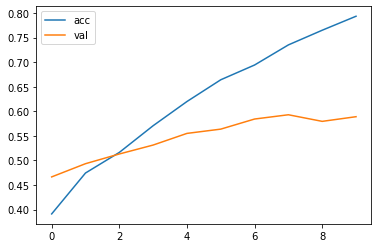

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['categorical_accuracy'],label='acc')
plt.plot(history.epoch,history.history['val_categorical_accuracy'],label='val')
plt.legend()

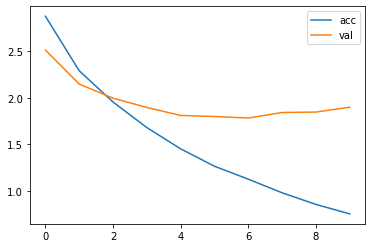

In [ ]:
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

In [ ]:
model_dl = pd.DataFrame({'Algorithm' : ['LSTM Model with Self Embedding', ' Bi Directional LSTM Model with Self Embedding', 
                                        'Self Attention Bi Directional LSTM Model with Self Embedding'],
                         'Validation Accuracy(%)' : [val_acc_lstm1, val_acc_lstm2, val_acc_lstm3],
                         'Test Accuracy(%)' : [scores1[1]*100, scores2[1]*100, scores3[1]*100]})

model_dl

,Algorithm,Validation Accuracy(%),Test Accuracy(%)
0,LSTM Model with Self Embedding,42.37,41.429475
1,Bi Directional LSTM Model with Self Embedding,61.26,60.531312
2,Self Attention Bi Directional LSTM Model with ...,59.29,56.356734


###2. Word Embedding: Glove

In [ ]:
#loading the pre-trained weights file
glove_file = (r'/content/drive/My Drive/glove.6B.zip')

In [ ]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

Get the Word Embeddings using Embedding file as given below

In [ ]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)9
    embeddings[word] = embd

Create a weight matrix for words in training docs

In [ ]:
embedding_matrix = np.zeros((num_words1, 200))#rounding the num_words

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_matrix.shape

(13910, 200)

Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.20)

In [ ]:
#checking the shape of the data after splitting data
print('shape of the training data: x:',x_train.shape,' y:',y_train.shape)
print('shape of the test data: x:',x_test.shape,' y:',y_test.shape)

shape of the training data: x: (6323, 200)  y: (6323, 54)
shape of the test data: x: (1581, 200)  y: (1581, 54)


In [ ]:
# importing necessary libraries
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, LSTM,TimeDistributed, Embedding, Dropout, Activation, Flatten, Bidirectional

Model 4: LSTM with Glove Embeddings

In [ ]:
#Building the model
model4 = Sequential()
model4.add(Embedding(num_words1,embedding_size,weights=[embedding_matrix],trainable=True))
model4.add(LSTM(150, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(54, activation='softmax'))
print(model4.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         2782000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 150)               210600    
_________________________________________________________________
dense_4 (Dense)              (None, 54)                8154      
Total params: 3,000,754
Trainable params: 3,000,754
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#defining loss function
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return categorical_crossentropy(y_true, y_pred)

In [ ]:
# Defining the optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.01)
model4.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Defining checkpoint, Early stop and ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=10)
stop = EarlyStopping(monitor="loss", patience=7, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=3, min_lr=1e-6, verbose=1, mode="min")

Fit the model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy

In [ ]:
#Fitting the model
batch_size = 50
epochs = 10
history = model4.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2, callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
  9/102 [=>............................] - ETA: 59s - loss: 3.2840 - accuracy: 0.3489
Epoch 00001: loss improved from inf to 3.29355, saving model to model-3.29.h5
 19/102 [====>.........................] - ETA: 56s - loss: 3.0870 - accuracy: 0.3747
Epoch 00001: loss improved from 3.29355 to 3.07594, saving model to model-3.08.h5
 29/102 [=======>......................] - ETA: 50s - loss: 2.9692 - accuracy: 0.3876
Epoch 00001: loss improved from 3.07594 to 2.96716, saving model to model-2.97.h5
 39/102 [==========>...................] - ETA: 43s - loss: 2.9231 - accuracy: 0.3913
Epoch 00001: loss improved from 2.96716 to 2.92051, saving model to model-2.92.h5
 49/102 [=============>................] - ETA: 37s - loss: 2.8937 - accuracy: 0.3927
Epoch 00001: loss improved from 2.92051 to 2.89830, saving model to model-2.90.h5
 59/102 [================>.............] - ETA: 30s - loss: 2.8886 - accuracy: 0.3915
Epoch 00001: loss improved from 2.89830 to 2.88640, saving model to

In [ ]:
#Printing the accuracy score for the model
val_acc4 = history.history['val_accuracy']
val_acc_lstm4=(np.round(np.max(val_acc4) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f' %val_acc_lstm4)
scores4 = model4.evaluate(x_test, y_test, verbose=0)
print("Accuracy of LSTM with Glove Embeddings: %.2f%%" % (scores4[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 43.40
Accuracy of LSTM with Glove Embeddings: 40.80%


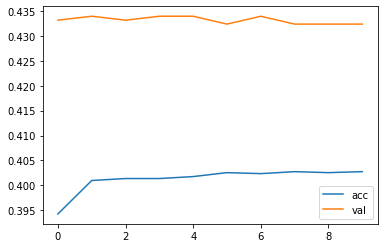

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['accuracy'],label='acc')
plt.plot(history.epoch,history.history['val_accuracy'],label='val')
plt.legend()

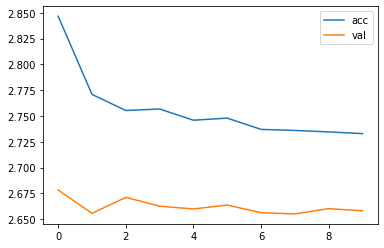

In [ ]:
#plotting epochs versus the loss for Training and Validation
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

Model 5:Bidirectional LSTM with Glove Embeddings

In [ ]:
#Model Building
import tensorflow as tf
model5 = Sequential()
model5.add(Embedding(num_words1,embedding_size,weights=[embedding_matrix],trainable=True))
model5.add(Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2)))
model5.add(Dense(54, activation='softmax'))
print(model5.summary())
model5.compile('adam','categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 200)         2782000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               421200    
_________________________________________________________________
dense_5 (Dense)              (None, 54)                16254     
Total params: 3,219,454
Trainable params: 3,219,454
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Fitting the model
batch_size = 100
epochs = 10
history = model5.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
 9/51 [====>.........................] - ETA: 52s - loss: 3.4584 - accuracy: 0.3256
Epoch 00001: loss did not improve from 2.60165
19/51 [==========>...................] - ETA: 42s - loss: 3.0456 - accuracy: 0.3726
Epoch 00001: loss did not improve from 2.60165
29/51 [================>.............] - ETA: 30s - loss: 2.8289 - accuracy: 0.4072
Epoch 00001: loss did not improve from 2.60165
39/51 [=====================>........] - ETA: 16s - loss: 2.6891 - accuracy: 0.4267
Epoch 00001: loss did not improve from 2.60165
49/51 [===========================>..] - ETA: 2s - loss: 2.5903 - accuracy: 0.4371
Epoch 00001: loss improved from 2.60165 to 2.58565, saving model to model-2.59.h5
51/51 [==============================] - 73s 1s/step - loss: 2.5787 - accuracy: 0.4387 - val_loss: 1.9825 - val_accuracy: 0.5336
Epoch 2/10
 8/51 [===>..........................] - ETA: 53s - loss: 1.9774 - accuracy: 0.5225
Epoch 00002: loss improved from 2.58565 to 1.99773, saving model to model-2.

In [ ]:
#Printing the accuracy score for the model
val_acc5 = history.history['val_accuracy']
val_acc_lstm5=(np.round(np.max(val_acc5) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f%%' %val_acc_lstm5)
scores5 = model5.evaluate(x_test, y_test, verbose=0)
print("Accuracy of Bidirectional LSTM with Glove Embedding : %.2f%%" % (scores5[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 67.51%
Accuracy of Bidirectional LSTM with Glove Embedding : 63.82%


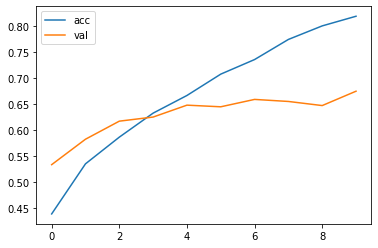

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['accuracy'],label='acc')
plt.plot(history.epoch,history.history['val_accuracy'],label='val')
plt.legend()

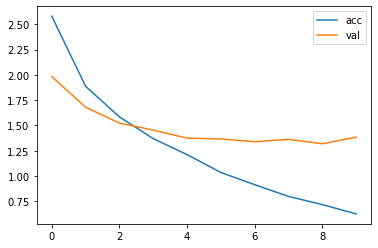

In [ ]:
#plotting epochs versus the loss for Training and Validation
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

Model 6 :LSTM with Self Attention layer with Glove embedding

In [ ]:
pip install keras-self-attention

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=10)
stop = EarlyStopping(monitor="loss", patience=13, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
from keras_self_attention import SeqSelfAttention
from keras.layers.embeddings import Embedding
from keras_self_attention import SeqWeightedAttention
model6 = Sequential()
input=keras.layers.Input(shape=(None,))
model6.add(Embedding(num_words1,embedding_size,weights=[embedding_matrix],trainable=True))
model6.add(Bidirectional(LSTM(units=175,return_sequences=True)))
model6.add(SeqWeightedAttention())
model6.add(Dense(units=54,activation='softmax'))
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 200)         2782000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 350)         526400    
_________________________________________________________________
seq_weighted_attention_2 (Se (None, 350)               351       
_________________________________________________________________
dense_6 (Dense)              (None, 54)                18954     
Total params: 3,327,705
Trainable params: 3,327,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 100
epochs = 10
history = model6.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
 9/51 [====>.........................] - ETA: 2s - loss: 3.5928 - categorical_accuracy: 0.3489
Epoch 00001: loss improved from inf to 3.50408, saving model to model-3.50.h5
19/51 [==========>...................] - ETA: 2s - loss: 3.1987 - categorical_accuracy: 0.3789
Epoch 00001: loss improved from 3.50408 to 3.18164, saving model to model-3.18.h5
29/51 [================>.............] - ETA: 1s - loss: 3.0443 - categorical_accuracy: 0.3872
Epoch 00001: loss improved from 3.18164 to 3.02317, saving model to model-3.02.h5
39/51 [=====================>........] - ETA: 0s - loss: 2.9333 - categorical_accuracy: 0.4008
Epoch 00001: loss improved from 3.02317 to 2.91914, saving model to model-2.92.h5
49/51 [===========================>..] - ETA: 0s - loss: 2.8277 - categorical_accuracy: 0.4186
Epoch 00001: loss improved from 2.91914 to 2.81415, saving model to model-2.81.h5
51/51 [==============================] - 5s 94ms/step - loss: 2.8072 - categorical_accuracy: 0.4215 - val_lo

In [ ]:
#Printing the accuracy score for the model
val_acc6 = history.history['val_categorical_accuracy']
val_acc_lstm6=(np.round(np.max(val_acc6) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f%%' %val_acc_lstm6)
scores6 = model6.evaluate(x_test, y_test, verbose=0)
print("Accuracy of LSTM with Attention layer with Glove embedding : %.2f%%" % (scores6[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 66.48%
Accuracy of LSTM with Attention layer with Glove embedding : 61.73%


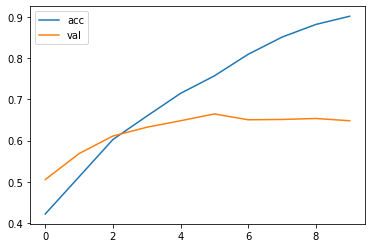

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['categorical_accuracy'],label='acc')
plt.plot(history.epoch,history.history['val_categorical_accuracy'],label='val')
plt.legend()

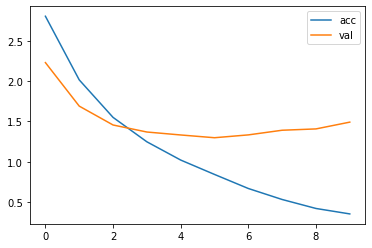

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

In [ ]:
model_dl1 = pd.DataFrame({'Algorithm' : ['LSTM Model with Glove Embedding', ' Bi Directional LSTM Model with Glove Embedding', 
                                        'Self Attention Bi Directional LSTM Model with Glove Embedding'],
                         'Validation Accuracy(%)' : [val_acc_lstm4, val_acc_lstm5, val_acc_lstm6],
                         'Test Accuracy(%)' : [scores4[1]*100, scores5[1]*100, scores6[1]*100]})
model_dl1

,Algorithm,Validation Accuracy(%),Test Accuracy(%)
0,LSTM Model with Glove Embedding,43.40,40.796965
1,Bi Directional LSTM Model with Glove Embedding,67.51,63.820368
2,Self Attention Bi Directional LSTM Model with ...,66.48,61.733079


###3. Word Embedding: Word2Vec

In [ ]:
deep_data.Cleansed_Desc=deep_data.Cleansed_Desc.astype(str)

In [ ]:
# vectorizing using Word2Vec
from gensim.models import Word2Vec
project_path = ( r'/content/drive/My Drive/')
sentences = [line.split(' ') for line in deep_data['Cleansed_Desc']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(project_path+ 'word2vec_vector.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Get the Word Embeddings using Embedding file as given below

In [ ]:
embeddings_index1 = dict()
f = open(project_path+'word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index1[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index1))

Loaded 13908 word vectors.


Create a weight matrix for words in training docs

In [ ]:

embedding_matrix1 = np.zeros((num_words1, 100))#rounding the num_words

for word, i in tokenizer.word_index.items():
    embedding_vector1 = embeddings_index1.get(word)
    if embedding_vector1 is not None:
        embedding_matrix1[i] = embedding_vector1

len(embeddings_index1.values())
embedding_matrix1.shape

(13910, 100)

In [ ]:
#defining parameters
maxlen = 200
numWords=13910
epochs = 10

Model 7: LSTM with Word2Vec Embedding

In [ ]:
#Building the model
input_layer1 = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(numWords,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer1)  #weights=[embedding_matrix]
lstm=(LSTM(128))(embed)
out=Dense(54,activation='softmax')(lstm) 

In [ ]:
#compiling the model
model7 = Model(input_layer1,out)
model7.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model7.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 200, 200)          2782000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_7 (Dense)              (None, 54)                6966      
Total params: 2,957,414
Trainable params: 2,957,414
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Defining the checkpoint,EarlyStopping and ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=10)
stop = EarlyStopping(monitor="loss", patience=15, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
#fitting the model
batch_size = 100
epochs = 10
history = model7.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
 8/51 [===>..........................] - ETA: 2s - loss: 3.9122 - accuracy: 0.4013
Epoch 00001: loss improved from inf to 3.80445, saving model to model-3.80.h5
18/51 [=========>....................] - ETA: 1s - loss: 3.4188 - accuracy: 0.4067
Epoch 00001: loss improved from 3.80445 to 3.35634, saving model to model-3.36.h5
29/51 [================>.............] - ETA: 1s - loss: 3.1791 - accuracy: 0.4066
Epoch 00001: loss improved from 3.35634 to 3.15553, saving model to model-3.16.h5
38/51 [=====================>........] - ETA: 0s - loss: 3.0772 - accuracy: 0.4055
Epoch 00001: loss improved from 3.15553 to 3.07084, saving model to model-3.07.h5
48/51 [===========================>..] - ETA: 0s - loss: 3.0264 - accuracy: 0.3996
Epoch 00001: loss improved from 3.07084 to 3.01509, saving model to model-3.02.h5
51/51 [==============================] - 3s 56ms/step - loss: 3.0125 - accuracy: 0.3992 - val_loss: 2.6694 - val_accuracy: 0.4324
Epoch 2/10
 7/51 [===>................

In [ ]:
#Printing the accuracy score for the model
val_acc7 = history.history['val_accuracy']
val_acc_lstm7=(np.round(np.max(val_acc7) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f%%' %val_acc_lstm7)
scores7 = model7.evaluate(x_test, y_test, verbose=0)
print("Accuracy of LSTM with Word2Vec Embedding: %.2f%%" % (scores7[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 43.40%
Accuracy of LSTM with Word2Vec Embedding: 40.80%


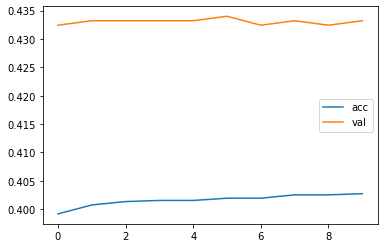

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['accuracy'],label='acc')
plt.plot(history.epoch,history.history['val_accuracy'],label='val')
plt.legend()

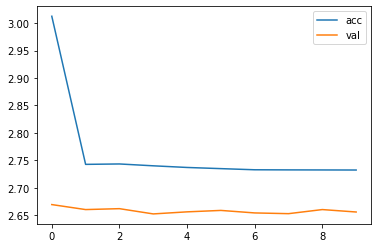

In [ ]:
#Plotting epochs versus the loss for Training and Validation
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

Model 8: Bi- Directional LSTM with Word2Vec Embedding

In [ ]:
#Model Building
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(numWords,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=Bidirectional(LSTM(128),trainable=True)(embed)
out=Dense(54,activation='softmax')(lstm) 

In [ ]:
#Compiling the model
batch_size = 100
epochs = 10
model8 = Model(input_layer,out)
model8.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model8.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 200, 200)          2782000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_8 (Dense)              (None, 54)                13878     
Total params: 3,132,774
Trainable params: 3,132,774
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the model
history = model8.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
 9/51 [====>.........................] - ETA: 2s - loss: 3.2973 - accuracy: 0.3844
Epoch 00001: loss did not improve from 2.65998
19/51 [==========>...................] - ETA: 1s - loss: 3.0160 - accuracy: 0.3989
Epoch 00001: loss did not improve from 2.65998
29/51 [================>.............] - ETA: 1s - loss: 2.8693 - accuracy: 0.4093
Epoch 00001: loss did not improve from 2.65998
39/51 [=====================>........] - ETA: 0s - loss: 2.7443 - accuracy: 0.4236
Epoch 00001: loss did not improve from 2.65998
49/51 [===========================>..] - ETA: 0s - loss: 2.6321 - accuracy: 0.4406
Epoch 00001: loss improved from 2.65998 to 2.62448, saving model to model-2.62.h5
51/51 [==============================] - 4s 76ms/step - loss: 2.6167 - accuracy: 0.4429 - val_loss: 2.0523 - val_accuracy: 0.5296
Epoch 2/10
 8/51 [===>..........................] - ETA: 2s - loss: 2.1576 - accuracy: 0.4938
Epoch 00002: loss improved from 2.62448 to 2.12895, saving model to model-2.13.h

In [ ]:
#Printing the accuracy score for the model
val_acc8 = history.history['val_accuracy']
val_acc_lstm8=(np.round(np.max(val_acc8) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f%%' %val_acc_lstm8)
scores8 = model8.evaluate(x_test, y_test, verbose=0)
print("Accuracy of BiDirectional LSTM with Word2Vec Embedding: %.2f%%" % (scores8[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 64.19%
Accuracy of BiDirectional LSTM with Word2Vec Embedding: 62.18%


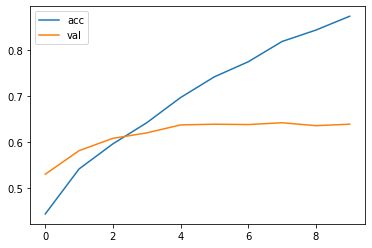

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['accuracy'],label='acc')
plt.plot(history.epoch,history.history['val_accuracy'],label='val')
plt.legend()

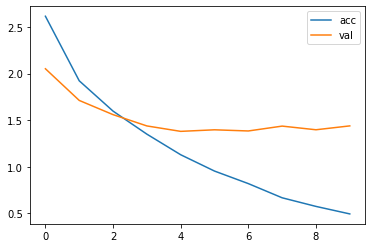

In [ ]:
#Plotting epochs versus the loss for Training and Validation
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

Model 9: Self attention with Word2Vec

In [ ]:
#Defining Checkpoints, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=10)
stop = EarlyStopping(monitor="loss", patience=15, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=6, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
#Model Building
embedding_size1=100
from keras_self_attention import SeqSelfAttention
from keras.layers.embeddings import Embedding
from keras_self_attention import SeqWeightedAttention
model9 = Sequential()
input=keras.layers.Input(shape=(None,))
model9.add(Embedding(num_words1,embedding_size1,weights=[embedding_matrix1],trainable=True))
model9.add(Bidirectional(LSTM(units=128,return_sequences=True)))
model9.add(SeqWeightedAttention())
model9.add(Dense(units=54,activation='softmax'))
model9.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model9.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         1391000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 256)         234496    
_________________________________________________________________
seq_weighted_attention_3 (Se (None, 256)               257       
_________________________________________________________________
dense_9 (Dense)              (None, 54)                13878     
Total params: 1,639,631
Trainable params: 1,639,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the Model
batch_size = 100
epochs = 10
history = model9.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[checkpoint, reduce_lr, stop],verbose=1)

Epoch 1/10
 9/51 [====>.........................] - ETA: 1s - loss: 3.7150 - categorical_accuracy: 0.3778
Epoch 00001: loss improved from inf to 3.65889, saving model to model-3.66.h5
19/51 [==========>...................] - ETA: 1s - loss: 3.2259 - categorical_accuracy: 0.4121
Epoch 00001: loss improved from 3.65889 to 3.21139, saving model to model-3.21.h5
28/51 [===============>..............] - ETA: 1s - loss: 3.0491 - categorical_accuracy: 0.4218
Epoch 00001: loss improved from 3.21139 to 3.00235, saving model to model-3.00.h5
38/51 [=====================>........] - ETA: 0s - loss: 2.8713 - categorical_accuracy: 0.4374
Epoch 00001: loss improved from 3.00235 to 2.84485, saving model to model-2.84.h5
49/51 [===========================>..] - ETA: 0s - loss: 2.7283 - categorical_accuracy: 0.4510
Epoch 00001: loss improved from 2.84485 to 2.71297, saving model to model-2.71.h5
51/51 [==============================] - 3s 61ms/step - loss: 2.7064 - categorical_accuracy: 0.4529 - val_lo

In [ ]:
#Printing the accuracy score for the model
val_acc9 = history.history['val_categorical_accuracy']
val_acc_lstm9=(np.round(np.max(val_acc9) * 100, 2))
print('Validation accuracy of self Embedding with LSTM Model is : %0.2f%%' %val_acc_lstm9)
scores9 = model9.evaluate(x_test, y_test, verbose=0)
print("Accuracy of Self attention with Word2Vec: %.2f%%" % (scores9[1]*100))

Validation accuracy of self Embedding with LSTM Model is : 64.98%
Accuracy of Self attention with Word2Vec: 62.62%


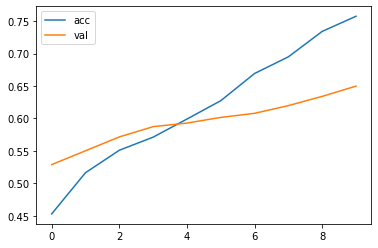

In [ ]:
#plotting epochs versus the accuracy for Training and Validation
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['categorical_accuracy'],label='acc')
plt.plot(history.epoch,history.history['val_categorical_accuracy'],label='val')
plt.legend()

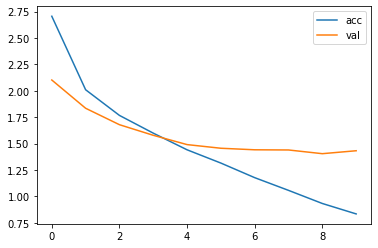

In [ ]:
#Plotting epochs versus the loss for Training and Validation
plt.plot(history.epoch,history.history['loss'],label='acc')
plt.plot(history.epoch,history.history['val_loss'],label='val')
plt.legend()

In [ ]:
model_dl2 = pd.DataFrame({'Algorithm' : ['LSTM Model with Word2Vec Embedding', ' Bi Directional LSTM Model with Word2Vec Embedding', 
                                        'Self Attention Bi Directional LSTM Model with Word2Vec Embedding'],
                         'Validation Accuracy(%)' : [val_acc_lstm7, val_acc_lstm8, val_acc_lstm9],
                         'Test Accuracy(%)' : [scores7[1]*100, scores8[1]*100, scores9[1]*100]})
model_dl2

,Algorithm,Validation Accuracy(%),Test Accuracy(%)
0,LSTM Model with Word2Vec Embedding,43.40,40.796965
1,Bi Directional LSTM Model with Word2Vec Embed...,64.19,62.175840
2,Self Attention Bi Directional LSTM Model with ...,64.98,62.618595


In [ ]:
main_frame=pd.concat([model_dl,model_dl1,model_dl2])
main_frame

,Algorithm,Validation Accuracy(%),Test Accuracy(%)
0,LSTM Model with Self Embedding,42.37,41.429475
1,Bi Directional LSTM Model with Self Embedding,61.26,60.531312
2,Self Attention Bi Directional LSTM Model with ...,59.29,56.356734
0,LSTM Model with Glove Embedding,43.40,40.796965
1,Bi Directional LSTM Model with Glove Embedding,67.51,63.820368
2,Self Attention Bi Directional LSTM Model with ...,66.48,61.733079
0,LSTM Model with Word2Vec Embedding,43.40,40.796965
1,Bi Directional LSTM Model with Word2Vec Embed...,64.19,62.175840
2,Self Attention Bi Directional LSTM Model with ...,64.98,62.618595


In [ ]:
main_frame.to_excel(r'/content/drive/My Drive/main_frame.xlsx')